#  Bike Sharing Demand Prediction 

## <b> Problem Description </b>

### Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.


## <b> Data Description </b>

### <b> The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.</b>


### <b>Attribute Information: </b>

* ### Date : year-month-day
* ### Rented Bike count - Count of bikes rented at each hour
* ### Hour - Hour of the day
* ### Temperature-Temperature in Celsius
* ### Humidity - %
* ### Windspeed - m/s
* ### Visibility - 10m
* ### Dew point temperature - Celsius
* ### Solar radiation - MJ/m2
* ### Rainfall - mm
* ### Snowfall - cm
* ### Seasons - Winter, Spring, Summer, Autumn
* ### Holiday - Holiday/No holiday
* ### Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)

**''Bike sharing clicks into a higher gear''**

Bike rental businesses give customers—who are often, but not necessarily, tourists—bicycles for a short period. Bikes are generally rented for a few hours to recreationally explore the locality. But the customer base might also consist of college students on campus or others who rent for practical reasons.

City bike rentals are particularly popular among tourists who like to explore their destination by bicycle. Usually, the customers of these businesses are most interested in an efficient, comfortable, and safe way of commuting from one place to another. Depending on the destination, weather conditions or the business can be seasonal. However, due to very seasonal industry it can be negatively affected by environmental forecasts and various other variables.


Bike sharing is increasingly attracting more riders in cities around the world for its benefits regarding the urban environment and public health.One critical issue that Seoul is currently facing is the serious air pollution levels. The city’s PM10 and PM2.5 levels maintained considerably high levels in the past few years.

**''*Go Green*''**



**Importing Dictionaries:**

In [135]:
#Import the necessary python libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from pylab import *
import seaborn as sns
import math

from sklearn.preprocessing import StandardScaler, LabelEncoder , MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoCV
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import ElasticNet


from sklearn import metrics
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV

import warnings
warnings.filterwarnings('ignore')

#**Data Warehousing**

In [136]:
# Importing dataset

df= pd.read_csv('BikeData.csv',encoding = "latin-1")

In [137]:
#Make a copy of our original dataset to protect it from any permanent changes.
bike_df = df.copy()

In general it is safer to work on copies than on original data frames, except when you know that you won't be needing the original anymore and want to proceed with the manipulated version.

In [138]:
#The first five rows of the dataset.
print('Top Five Instances of Dataset:')
bike_df.head()

Top Five Instances of Dataset:


,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [139]:
#Checking last five rows of dataset.
print("Last Five Instances of Dataset:")
bike_df.tail()

Last Five Instances of Dataset:


,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes
8759,30/11/2018,584,23,1.9,43,1.3,1909,-9.3,0.0,0.0,0.0,Autumn,No Holiday,Yes


In [140]:
#Reviewing the variables
print('Here are the features : ')
bike_df.columns

Here are the features : 


Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

#**Data Inspection**

In [141]:
#Recall data
bike_df

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes


As we can see our data have **8760 instances** and **14 features**.

In [142]:
#Checking the type of data.
print("Data type of each column:")
bike_df.info()

Data type of each column:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day       

After data types , we can observe that seasons, holiday, functioning_day , Date are categorical columns among all features.
Therefore we'll check their unique values .

In [143]:
#Checking the number of unique values in columns.
print("No.of unique values in each column:")
bike_df.nunique(axis=0)

No.of unique values in each column:


Date                          365
Rented Bike Count            2166
Hour                           24
Temperature(°C)               546
Humidity(%)                    90
Wind speed (m/s)               65
Visibility (10m)             1789
Dew point temperature(°C)     556
Solar Radiation (MJ/m2)       345
Rainfall(mm)                   61
Snowfall (cm)                  51
Seasons                         4
Holiday                         2
Functioning Day                 2
dtype: int64

In [144]:
#Getting the number of unique values of some categorical variables with their counts.
for var in bike_df.columns:
    if var in ['Holiday','Functioning Day','Seasons']:
        print(f'The column {var} has unique values\n{bike_df[var].value_counts()}')

The column Seasons has unique values
Spring    2208
Summer    2208
Autumn    2184
Winter    2160
Name: Seasons, dtype: int64
The column Holiday has unique values
No Holiday    8328
Holiday        432
Name: Holiday, dtype: int64
The column Functioning Day has unique values
Yes    8465
No      295
Name: Functioning Day, dtype: int64


#**Data Cleaning**

Data Cleaning is the process of finding and correcting the inaccurate/incorrect data that are present in the dataset. One such process needed is to do something about the values that are missing in the dataset. In real life, many datasets will have many missing values, so dealing with them is an important step.




**Duplicate entries can ruin the split between train, validation and test sets in cases where identical entries are not all in the same set. This can lead to biased performance estimates that will lead to disappointing models in production.**

In [145]:
# Checking Duplicate Values
value=len(bike_df[bike_df.duplicated()])
print("The number of duplicate values in the data set is = ",value)

The number of duplicate values in the data set is =  0


##**Checking for missing values**:



In [146]:
#Some details about the features.
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

**As we seen above, features are combination of string,integer and float datatype.**

In [147]:
#Null-Values in percentage form.
(bike_df.isnull().sum()/bike_df.shape[0])*100

Date                         0.0
Rented Bike Count            0.0
Hour                         0.0
Temperature(°C)              0.0
Humidity(%)                  0.0
Wind speed (m/s)             0.0
Visibility (10m)             0.0
Dew point temperature(°C)    0.0
Solar Radiation (MJ/m2)      0.0
Rainfall(mm)                 0.0
Snowfall (cm)                0.0
Seasons                      0.0
Holiday                      0.0
Functioning Day              0.0
dtype: float64

* **Why do you need to fill in the missing data?** Because most of the machine learning models that you want to use will provide an error if you pass NaN values into it. The easiest way is to just fill them up with 0, but this can reduce your model accuracy significantly.

* **Fortunately, as seen above, we do not have any Null/Missing values or duplicate values.**

***Python read "Date" column as an object type, basically it reads as a string, as the date column is very important to analyze the users behaviour so we need to convert it into datetime format then we split it into 3 column i.e 'year', 'month', 'day' as a category data type.***

In [148]:
#Converting date column from string to datetime features

bike_df['Date'] = pd.to_datetime(bike_df.Date)

The date column is converted to datetime datatype

In [149]:
#add month , day, year columns
for df in [bike_df]:
    bike_df['month'] = bike_df['Date'].dt.month
    bike_df['year'] = bike_df['Date'].dt.year
    bike_df['day'] = bike_df['Date'].dt.day

* We convert the "date" column into 3 different columns i.e "year","month","day".
* The "year" column in our data set contains 2 unique numbers and the details from 2017 December to 2018 November. So if I consider this is a one year, then we don't need the "year" column, so we going to drop it.
* The other column "day" contains data about each day of the month. For our convenience, we don't need data about each day of the month, but we do need relevant data about whether a day is a weekday or a weekend, so we convert it into this format and drop the "day" column.

##Numbers when the facility for sharing bicycle rentals is not functioning day?

In [150]:
#Ploting Pivot table for the function day or not function day with respect to holiday or not holiday
pd.pivot_table(bike_df, index=['Holiday', 'Functioning Day'], columns='Seasons', values='Rented Bike Count',
               aggfunc=lambda x: len(x), margins=True, margins_name='TOTAL')

Seasons                     Autumn  Spring  Summer  Winter  TOTAL
Holiday    Functioning Day                                       
Holiday    No                 24.0     NaN     NaN     NaN     24
           Yes                96.0    72.0    48.0   192.0    408
No Holiday No                223.0    48.0     NaN     NaN    271
           Yes              1841.0  2088.0  2160.0  1968.0   8057
TOTAL                       2184.0  2208.0  2208.0  2160.0   8760

* In autumn, there are 24 records when that day is holiday but not functioning and 223 records when that day is Non Holiday and also not functioning day.

* In spring, there are 48 records when that day is work day but not functioning. In conclusion, demand for bike rentals declines on non-operational days, as was the case in the spring and autumn.

* When there is a functional day and not a holiday, the records are higher.

**Exploratory Data Analysis (EDA)**

An EDA is a detailed analysis designed to reveal a data set's underlying structure. It is significant for a business because it identifies trends, patterns, and linkages that are not intuitively clear.

##**Descriptive Statistics**

In [151]:
#Getting some statical information about data.
bike_df.describe()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),month,year,day
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068,6.526027,2017.915068,15.720548
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746,3.448048,0.278796,8.796749
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000,1.000000,2017.000000,1.000000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000,4.000000,2018.000000,8.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000,7.000000,2018.000000,16.000000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000,10.000000,2018.000000,23.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000,12.000000,2018.000000,31.000000


**Univariate Analysis**

* Provides summary statistics for each field in the raw data set or summary only on one variable.

* The ultimate purpose of a Univariate analysis is to simply explain the data and look for patterns therein.

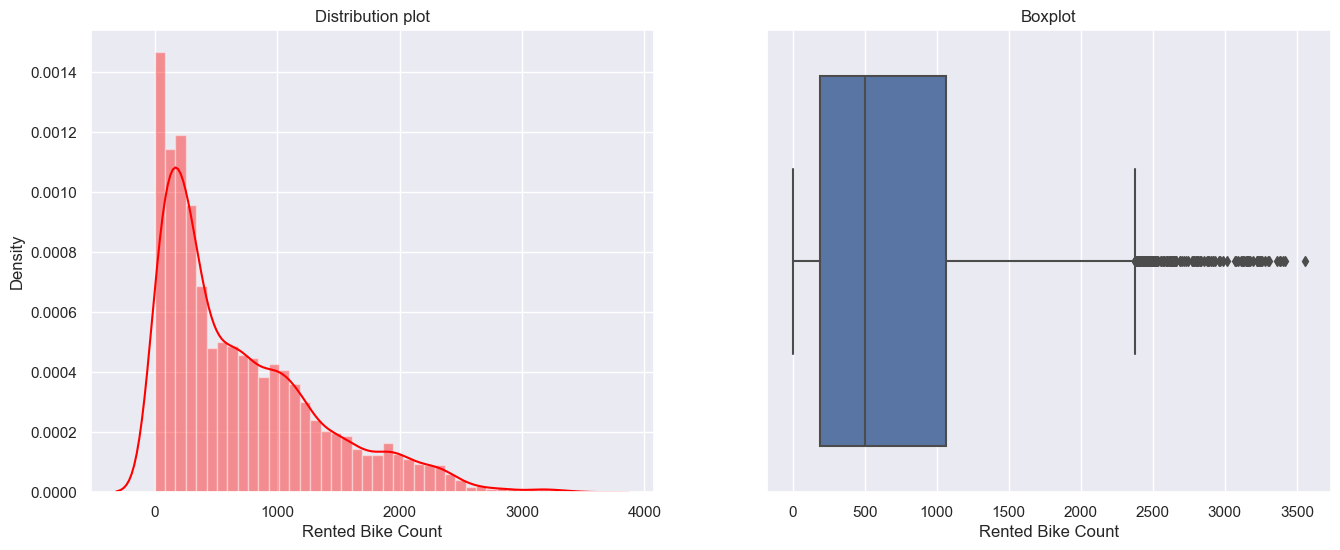

In [152]:
#Let us look at dependent variable 'rented_bike_count'
#Densityplot
sns.set(rc={"figure.figsize": (16, 6)})
subplot(1,2,1)
sns.distplot(bike_df['Rented Bike Count'], color='red')
plt.title('Distribution plot')
#Boxplot
subplot(1,2,2)
sns.boxplot(bike_df['Rented Bike Count'])
plt.title('Boxplot');

***From above, it is clear that the dependent variable has a significant right skewed distribution and a considerable number of outliers.***

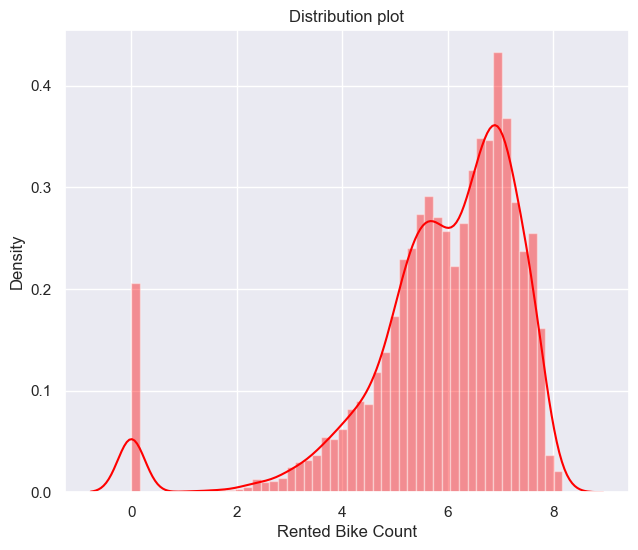

In [153]:
#Balancing the skewness using log transformation
# log1p is used instead of log10 to make value positive in array.
sns.set(rc={"figure.figsize": (16, 6)})
subplot(1,2,1)
sns.distplot(np.log1p(bike_df['Rented Bike Count']), color='red')
plt.title('Distribution plot');

**The log transformation gives us a left skewed distriution.**

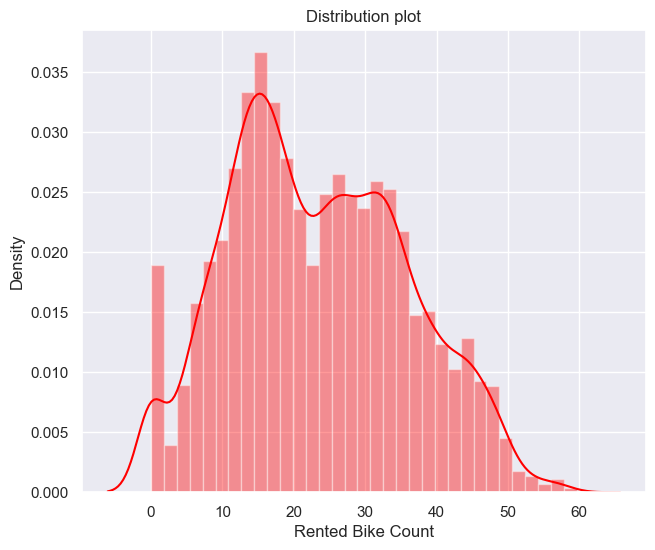

In [154]:
#For the normalise rented bike count data use sqrt
sns.set(rc={"figure.figsize": (16, 6)})
subplot(1,2,1)
sns.distplot(np.sqrt(df['Rented Bike Count']), color='red')
plt.title('Distribution plot');

**The square root transformation on the dependent variable gives us distribution which is almost normal in nature.**

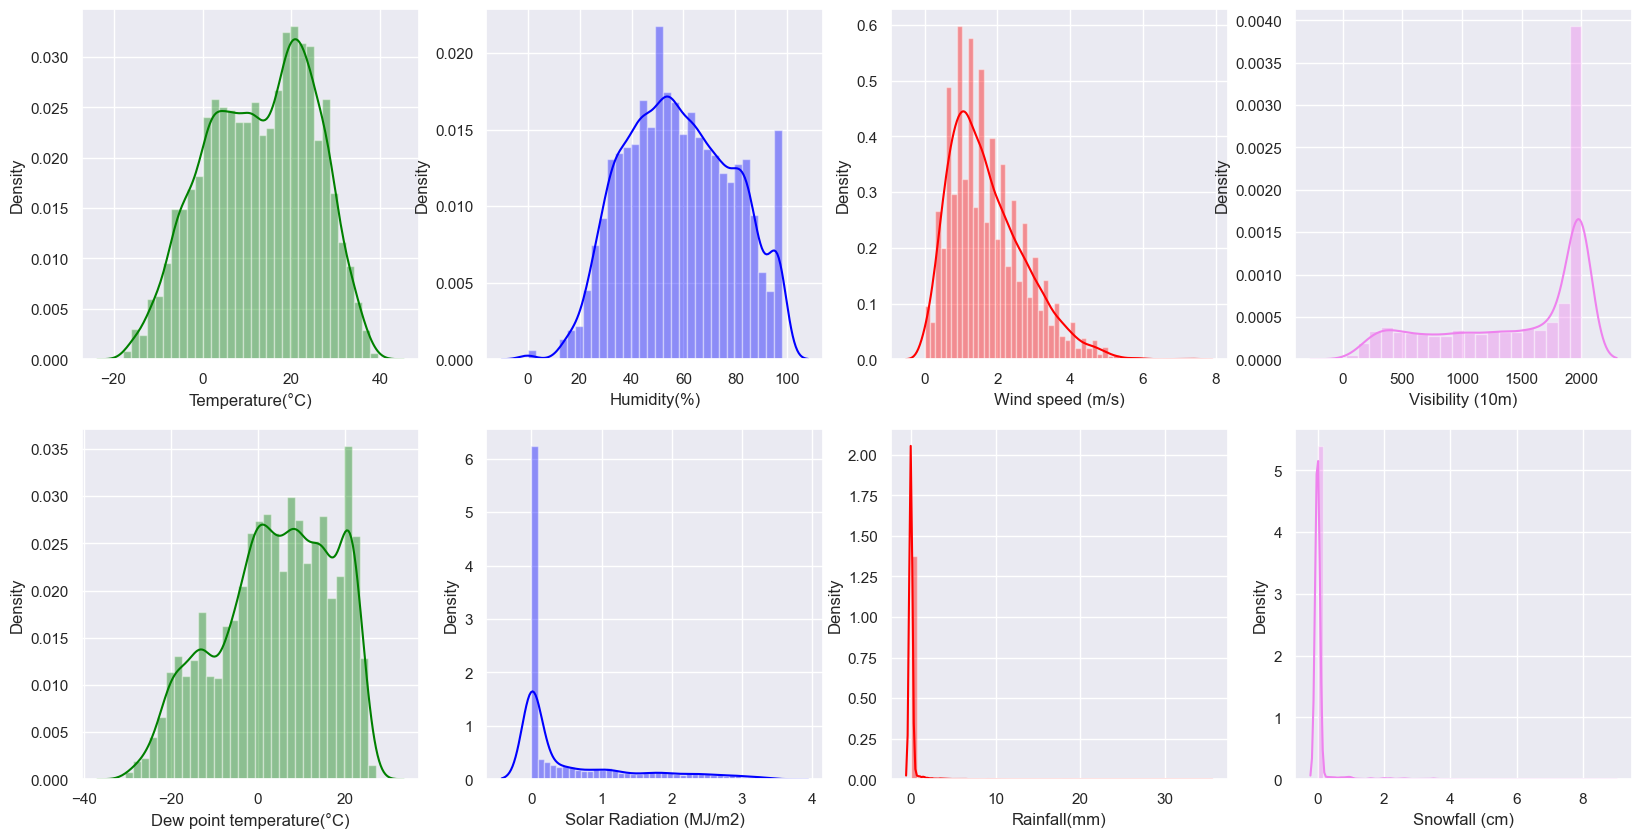

In [155]:
# display distribution of the independent features
sns.set(rc={"figure.figsize": (20, 10)})
subplot(2,4,1)
sns.distplot(bike_df['Temperature(°C)'], color='green' )
subplot(2,4,2)
sns.distplot(bike_df['Humidity(%)'], color='blue')
subplot(2,4,3)
sns.distplot(bike_df['Wind speed (m/s)'], color='red')
subplot(2,4,4)
sns.distplot(bike_df['Visibility (10m)'], color='violet')
subplot(2,4,5)
sns.distplot(bike_df['Dew point temperature(°C)'], color='green' )
subplot(2,4,6)
sns.distplot(bike_df['Solar Radiation (MJ/m2)'], color='blue')
subplot(2,4,7)
sns.distplot(bike_df['Rainfall(mm)'], color='red')
subplot(2,4,8)
sns.distplot(bike_df['Snowfall (cm)'], color='violet');

* We can see from the preceding distplots that **"Temperature"**, **"Dew point temperature"** and **"Humidity"** follow approximately normal distribution.
* The distribution of all other variables is either left- or right-skewed.

##**Bivariate Analysis**

It is performed to find the relationship between each variable in the dataset and the target variable of interest or using 2 variables and finding the relationship between them.

In [156]:
#Defining compare features with target variable.
comp_features = bike_df[['Temperature(°C)','Dew point temperature(°C)','Humidity(%)','Hour','Seasons','Wind speed (m/s)','Visibility (10m)']]

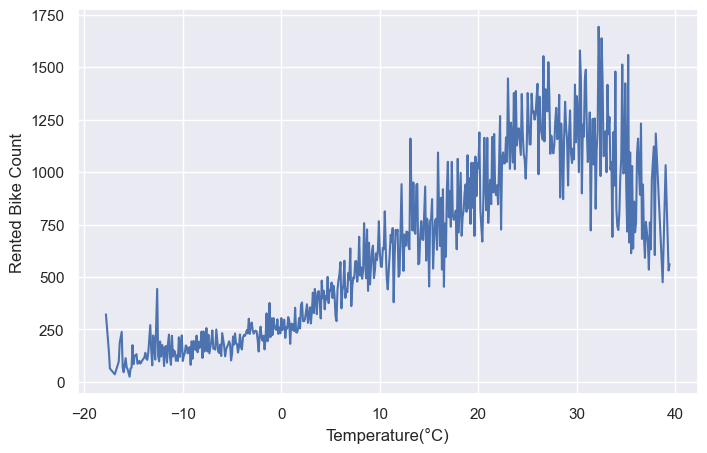

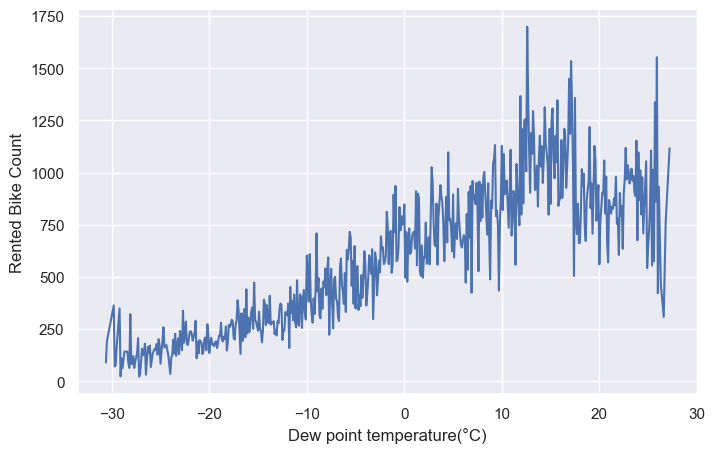

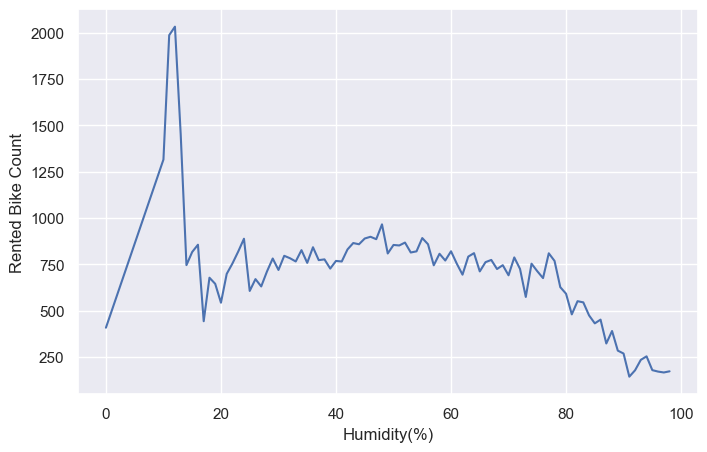

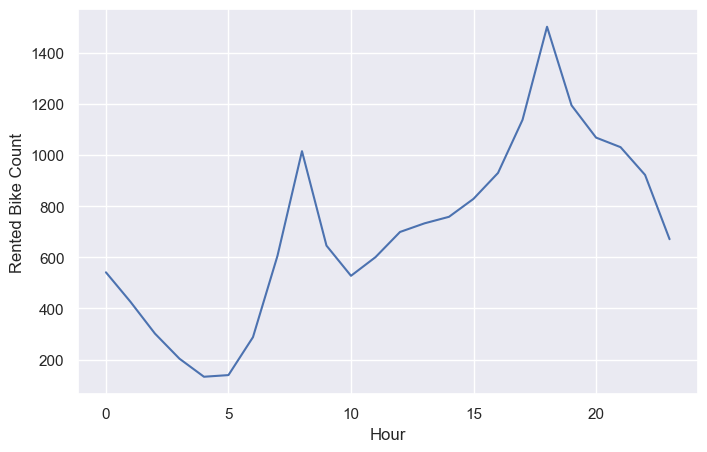

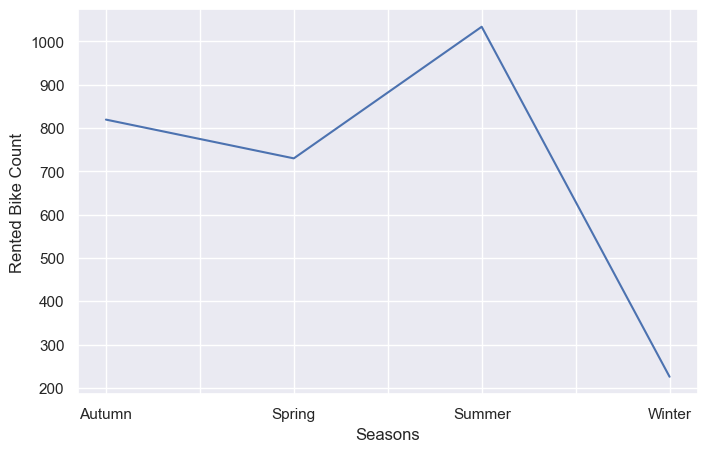

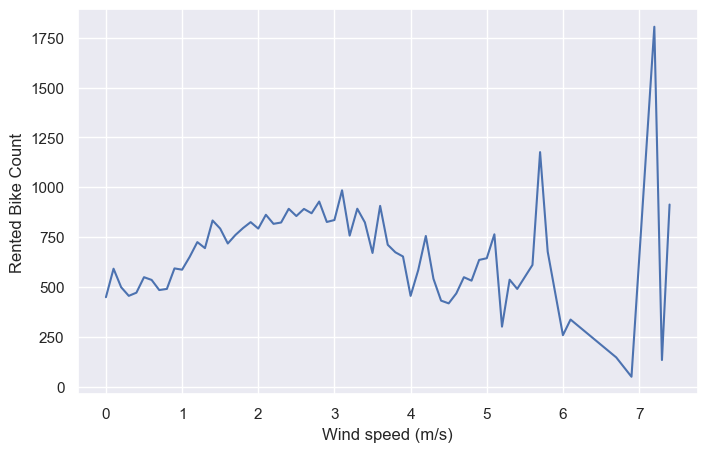

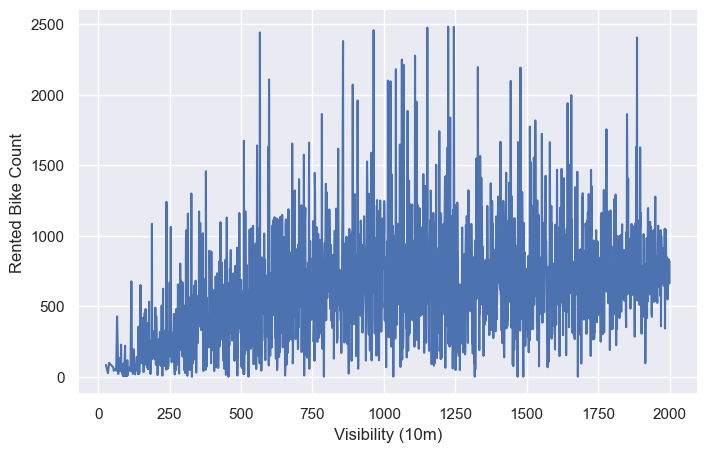

In [157]:
#Plots
for col in comp_features:
    plt.figure(figsize=(8,5))
    bike_df.groupby(col).mean()['Rented Bike Count'].plot()
    plt.xlabel(col)
    plt.ylabel('Rented Bike Count')
plt.show()

**Some of the following observations can be interpreted based on the above analysis:**

* The trend for bike rentals grows from **temperature 20 to 32 degrees** Celsius.

* The dew point temperature behaves similar to the temperature for the dependant variable.

* **Lower humidity** tends to increase demand for bike rentals.

* The bike usage is high in peak office hours that is **7-9 AM in morning and 6-8 PM in evening**.

* People prefer to drive in the **summer season** when the **wind is stronger**.

In [158]:
#Allocating numerical features.
numeric_features = bike_df.describe().columns
numeric_features

Index(['Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'month',
       'year', 'day'],
      dtype='object')

##**Let's us see the regression scatterplot for relation between independent and dependent variable:**

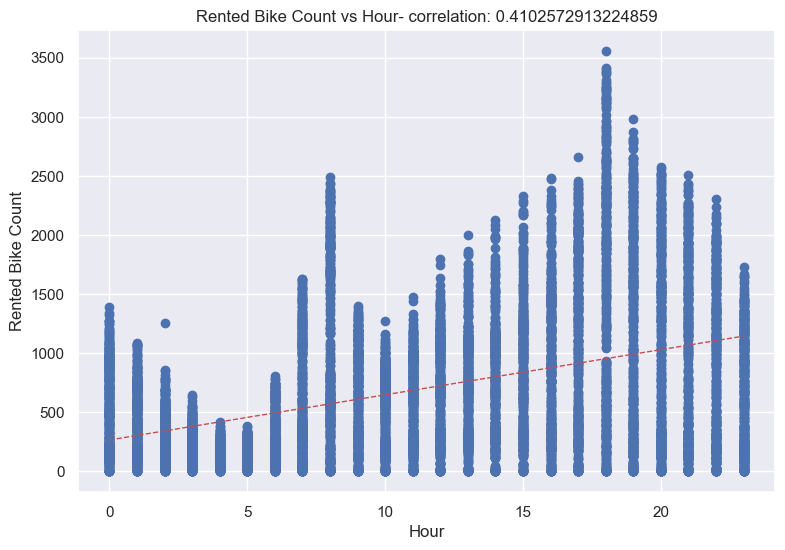

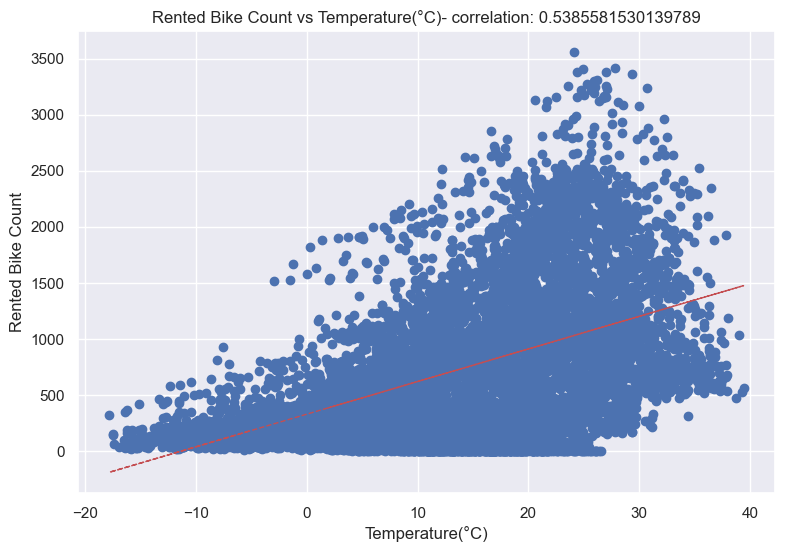

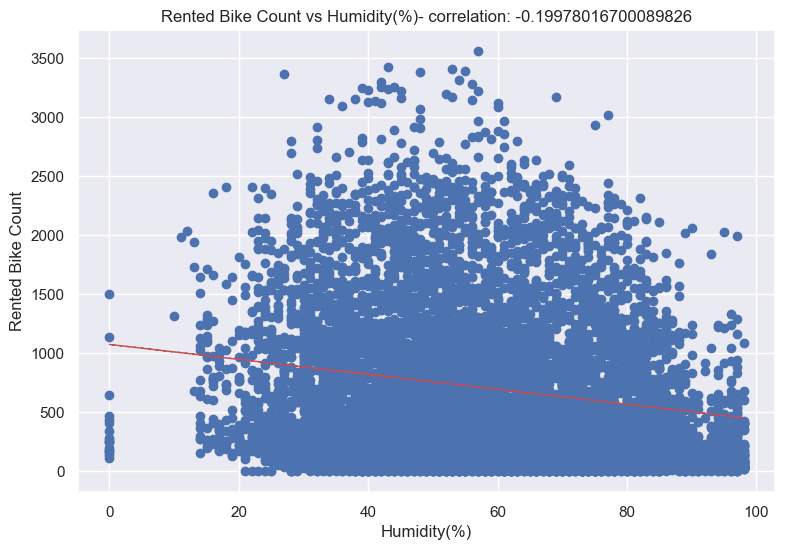

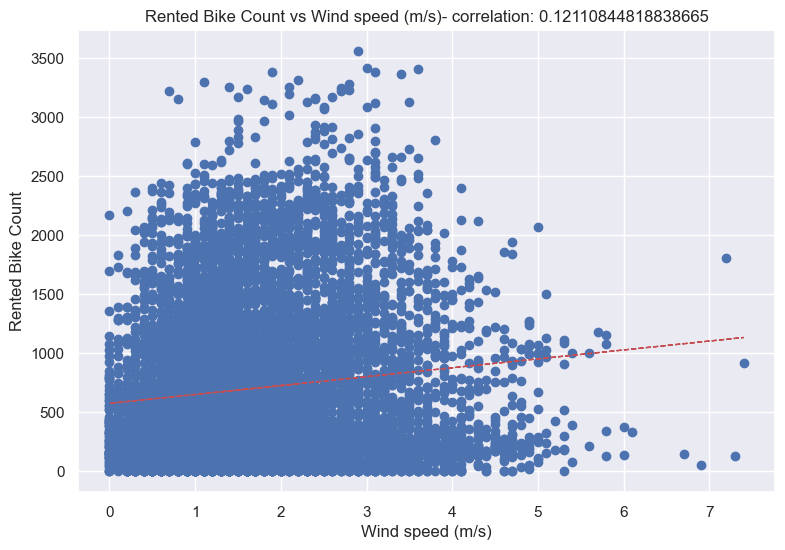

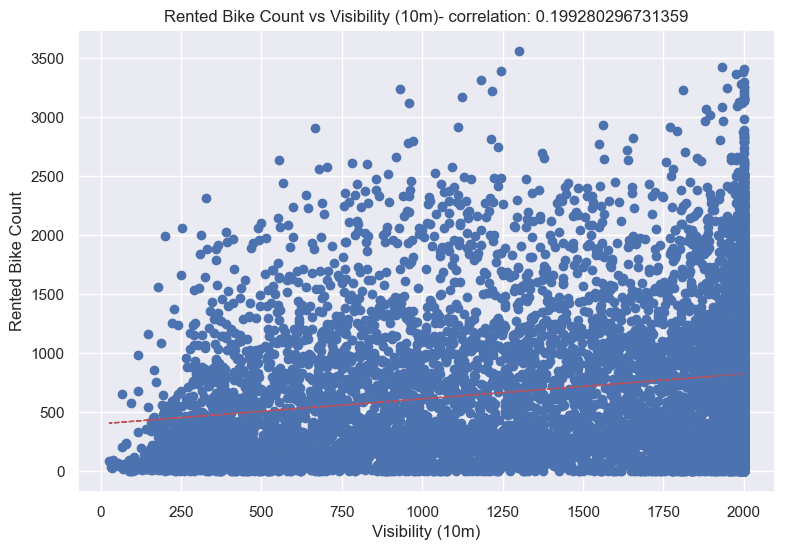

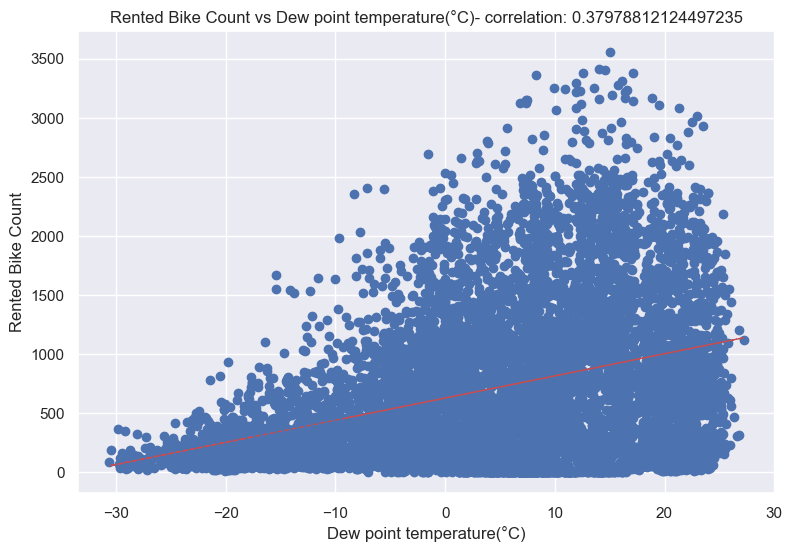

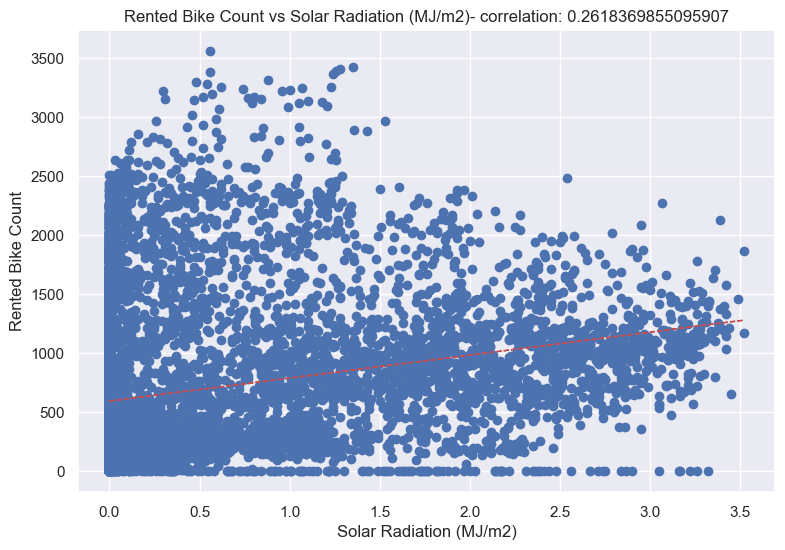

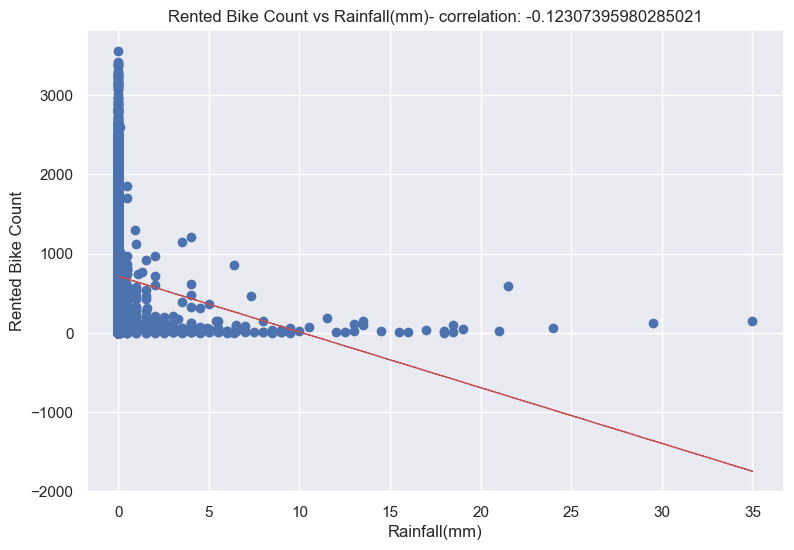

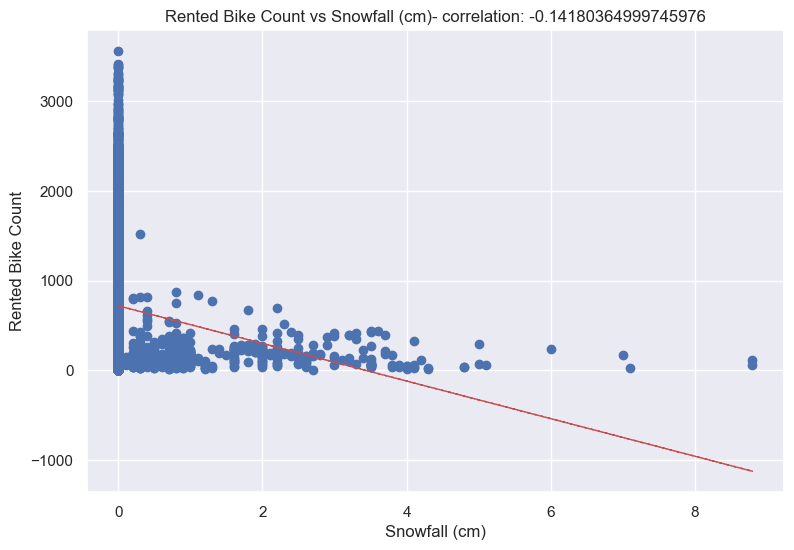

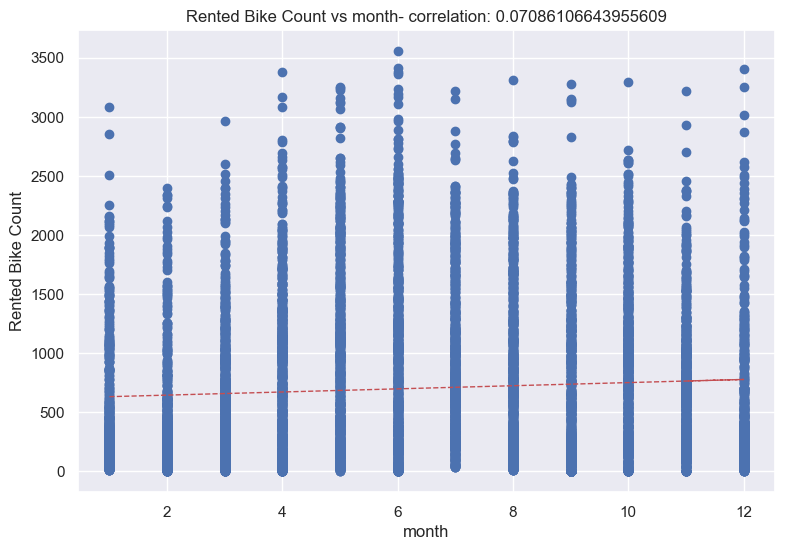

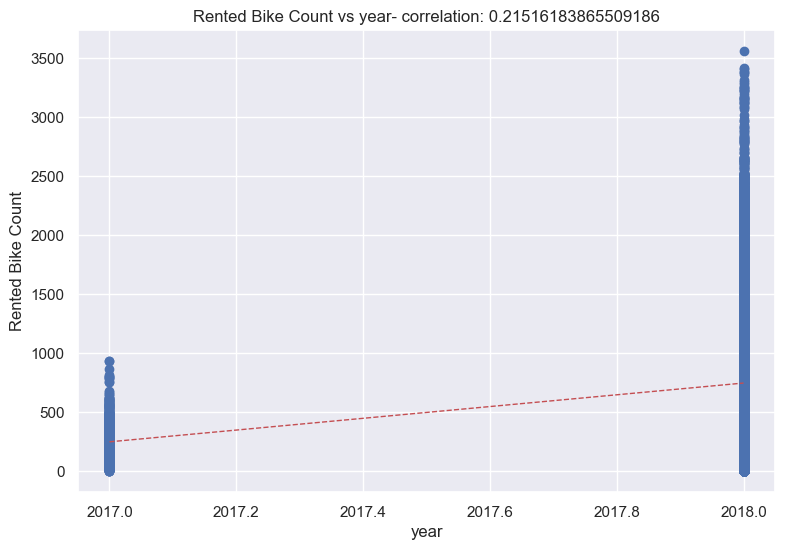

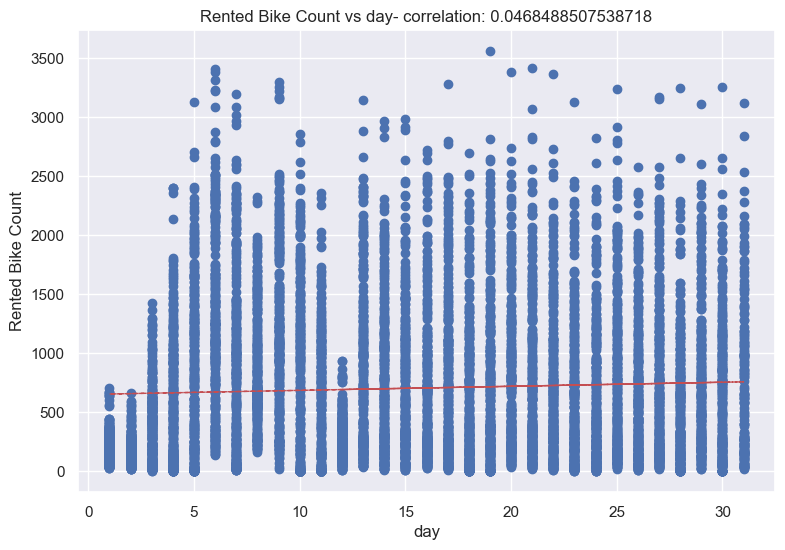

In [159]:
# plot scatter dataset correlation of rented bike data vs all numerical variables
# check Homoscedasticity
for col in numeric_features[1:]:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = bike_df[col]
    label = bike_df['Rented Bike Count']
    correlation = feature.corr(label)
    plt.scatter(x=feature, y=label)
    plt.xlabel(col)
    plt.ylabel('Rented Bike Count')
    ax.set_title('Rented Bike Count vs ' + col + '- correlation: ' + str(correlation))
    z = np.polyfit(bike_df[col], bike_df['Rented Bike Count'], 1)
    y_hat = np.poly1d(z)(bike_df[col])

    plt.plot(bike_df[col], y_hat, "r--", lw=1)

plt.show()

**We can identify the following insights using regression plot:**

*   Hour exhibits positive linearity with rented bike count, but it doesn't seems homoscadastic in nature.
*   The temperature feature has a little homoscadastic nature and is positively linear with the frequency of rented bikes.
*   Humidity, sun radiation, snowfall, and rainfall all show negative linearity with the target variable, indicating that in real-world conditions, individuals avoid riding bikes during snowfall, rain, and high humidity. 
*   Positive linearity of wind speed and visibility with rented bike count is somewhat intuitive, since higher wind speed and greater visibility tend to increase demand for rental bikes.
*   Month, Year, and Day have hardly any effect on our target variable.


**Identifying Multicollinearity:**

A correlation could be positive, meaning both variables move in the same direction, or negative, meaning that when one variable’s value increases, the other variables’ values decrease. Correlation can also be neutral or zero, meaning that the variables are unrelated.

* Positive Correlation: both variables change in the same direction.
* Neutral Correlation: No relationship in the change of the variables.
* Negative Correlation: variables change in opposite directions.

The performance of some algorithms can deteriorate if two or more variables are tightly related, called multicollinearity. 

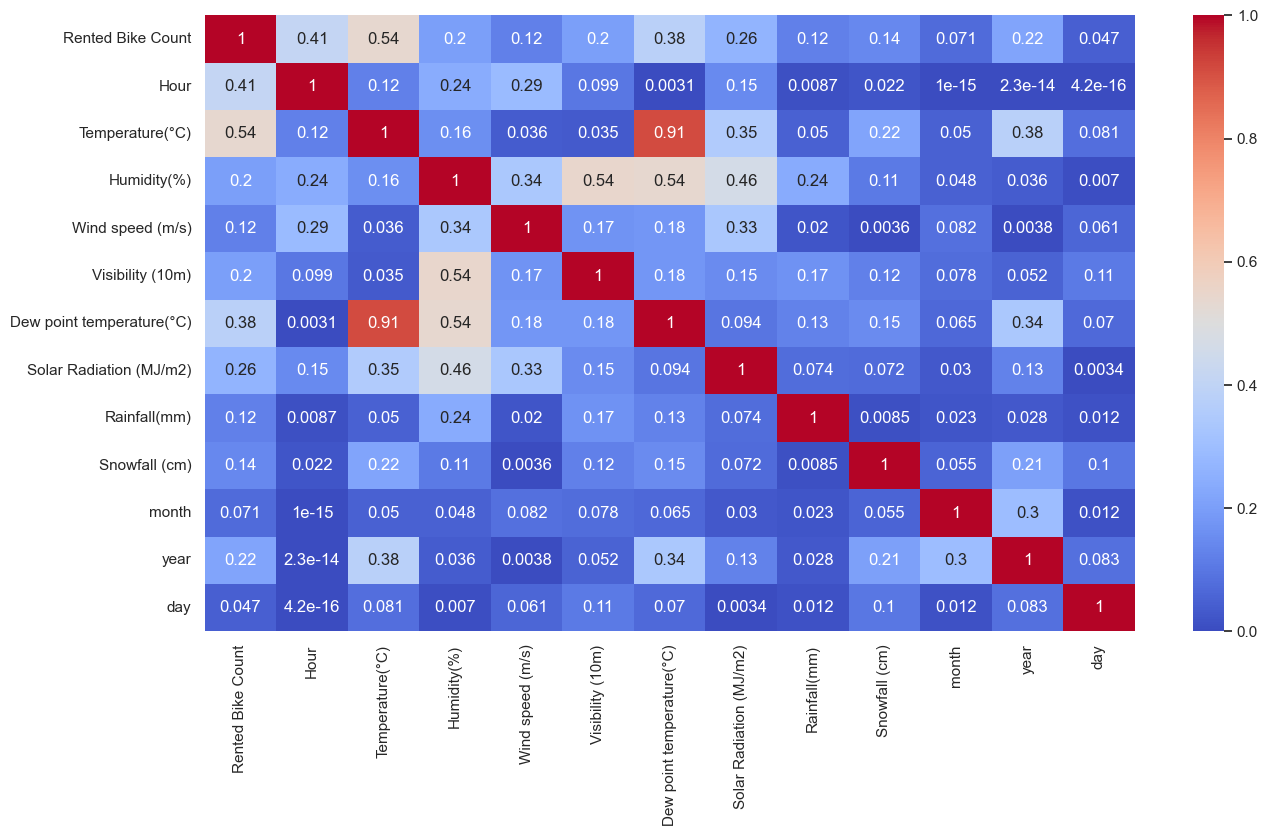

In [160]:
## Check Correlation matrix.
plt.figure(figsize=(15,8))
correlation = bike_df.corr()
sns.heatmap(abs(correlation), annot=True, cmap='coolwarm');

**From above Heatmap we can see that:**

* The **Dew point temperature** attributes have a high correlation with the **Temperature** attributes. As a result, it can be dropped.
* As we can observe, our target variable, the Rental Bike Count, is significantly dependent on the temperature parameter.

In [161]:
# Removing Multicollinearity
bike_df = bike_df.drop(['Dew point temperature(°C)'], axis=1)

In [162]:
bike_df1 = bike_df.drop(['Rented Bike Count'], axis=1)

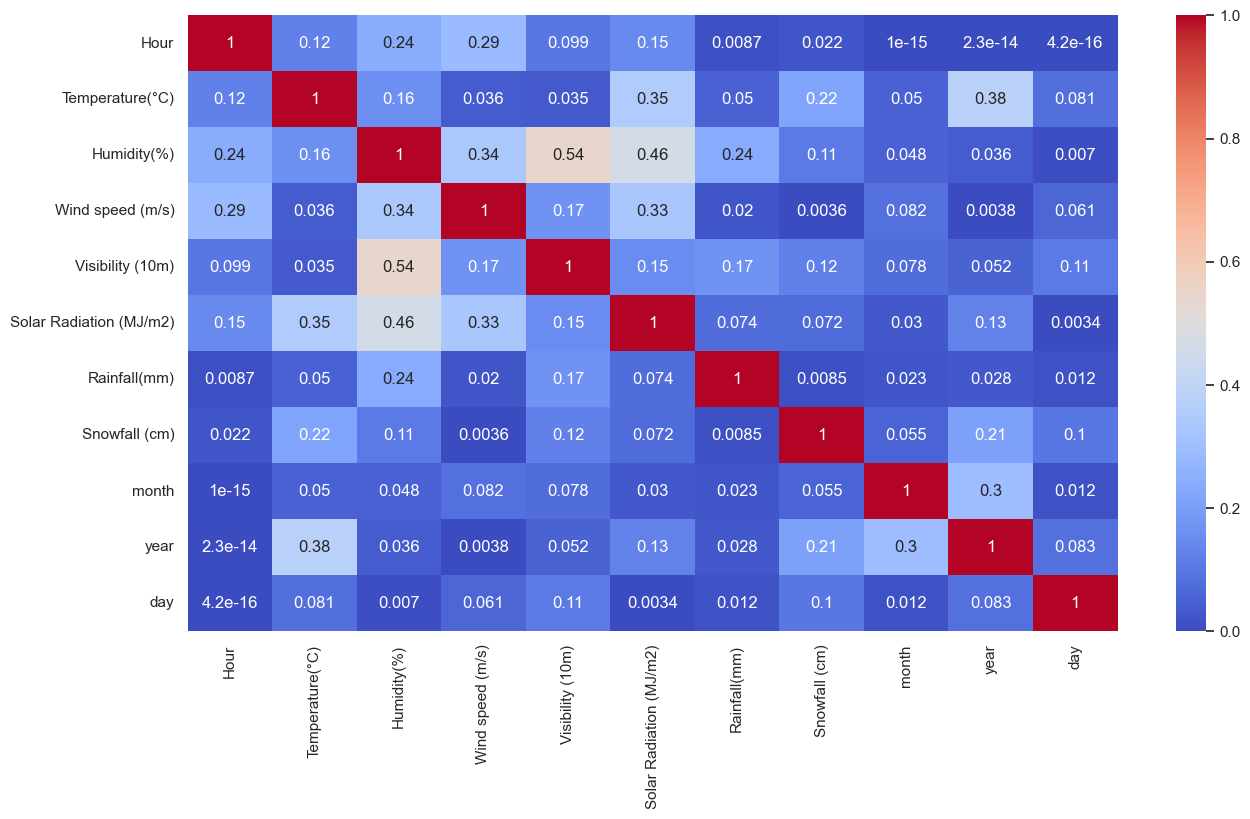

In [163]:
plt.figure(figsize=(15,8))
correlation = bike_df1.corr()
sns.heatmap(abs(correlation), annot=True, cmap='coolwarm');

***Multicollinearity can be detected using various techniques, one such technique being the Variance Inflation Factor(VIF).In VIF method, we pick each feature and regress it against all of the other features.***

In [164]:
#By using VIF score we can also remove Multicollinearity
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [165]:
calc_vif(bike_df[[i for i in bike_df.describe().columns if i not in ['Date','Rented Bike Count','month','year','day']]])

,variables,VIF
0,Hour,3.921832
1,Temperature(°C),3.228318
2,Humidity(%),4.868221
3,Wind speed (m/s),4.608625
4,Visibility (10m),4.710170
5,Solar Radiation (MJ/m2),2.246791
6,Rainfall(mm),1.079158
7,Snowfall (cm),1.120579


**Hence, above we have defined a function called "calc_vif" to determine our Variance Inflation Factor(VIF) score for each feature.**

**Mathematically, it can be determined by 1 / (1 − R^2)**

* **This R^2 value is between independent variables.**

In [166]:
bike_df[['Date','month','Hour','year','day']] = bike_df[['Date','month','Hour','year','day']].astype('object')

date,month, year day is date time feature.

In [167]:
#Identifying categorical variables
categorical = [var for var in bike_df.columns if bike_df[var].dtype=='O']
print('There are {} categorical variables: '.format(len(categorical)),categorical)

There are 8 categorical variables:  ['Date', 'Hour', 'Seasons', 'Holiday', 'Functioning Day', 'month', 'year', 'day']


In [168]:
#Identifying Numerical variables
numerical = [var for var in bike_df.columns if bike_df[var].dtype!='O']
print('There are {} numerical variables: '.format(len(numerical)), numerical)

There are 8 numerical variables:  ['Rented Bike Count', 'Temperature(°C)', 'Humidity(%)', 'Wind speed (m/s)', 'Visibility (10m)', 'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)']


In [169]:
#Print numerical and categorical independent features seperately.
numerical_features = numerical[1:]
categorical_features = categorical[1:]
print(numerical_features)
print(categorical_features)

['Temperature(°C)', 'Humidity(%)', 'Wind speed (m/s)', 'Visibility (10m)', 'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)']
['Hour', 'Seasons', 'Holiday', 'Functioning Day', 'month', 'year', 'day']


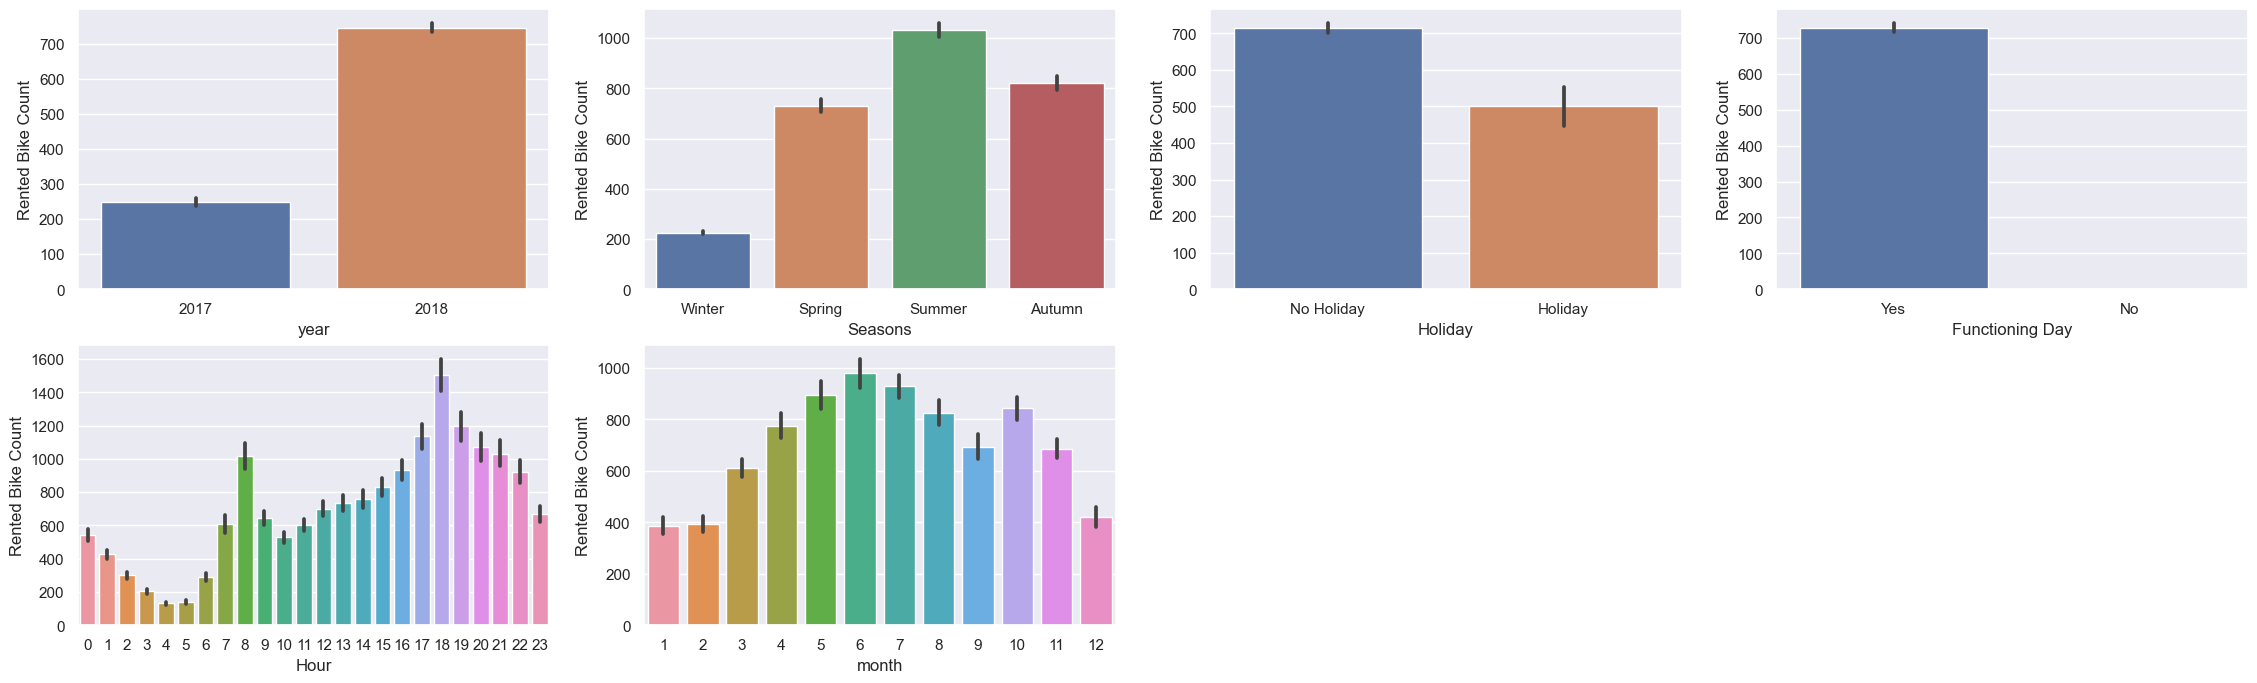

In [170]:
#Plotting barplot for categorical features.
sns.set(rc={"figure.figsize": (28, 8)})
subplot(2,4,1)
sns.barplot(bike_df['year'], y=df['Rented Bike Count'])
subplot(2,4,2)
sns.barplot(x=bike_df['Seasons'],y=df['Rented Bike Count'])
subplot(2,4,3)
sns.barplot(x=bike_df['Holiday'],y=df['Rented Bike Count'])
subplot(2,4,4)
sns.barplot(x=bike_df['Functioning Day'],y=df['Rented Bike Count'])
subplot(2,4,5)
sns.barplot(x=bike_df['Hour'],y=df['Rented Bike Count'])
subplot(2,4,6)
sns.barplot(x=bike_df['month'],y=df['Rented Bike Count']);

**We may interpret the following information based on the above plots:**

* During **peak office hours**, it appears that rented bikes are in high demand.
* As it was seen in the preliminary analysis, riding a bike is prioritized during the **summer months**.
* On **non-holiday days**, consumption for bikes is **prominent**.
* It is intutive that, on **functioning days**, there is a **significant demand** for bikes.
* The month of **June** appears to be the most demanding one overall.

## **Handling Outliers**

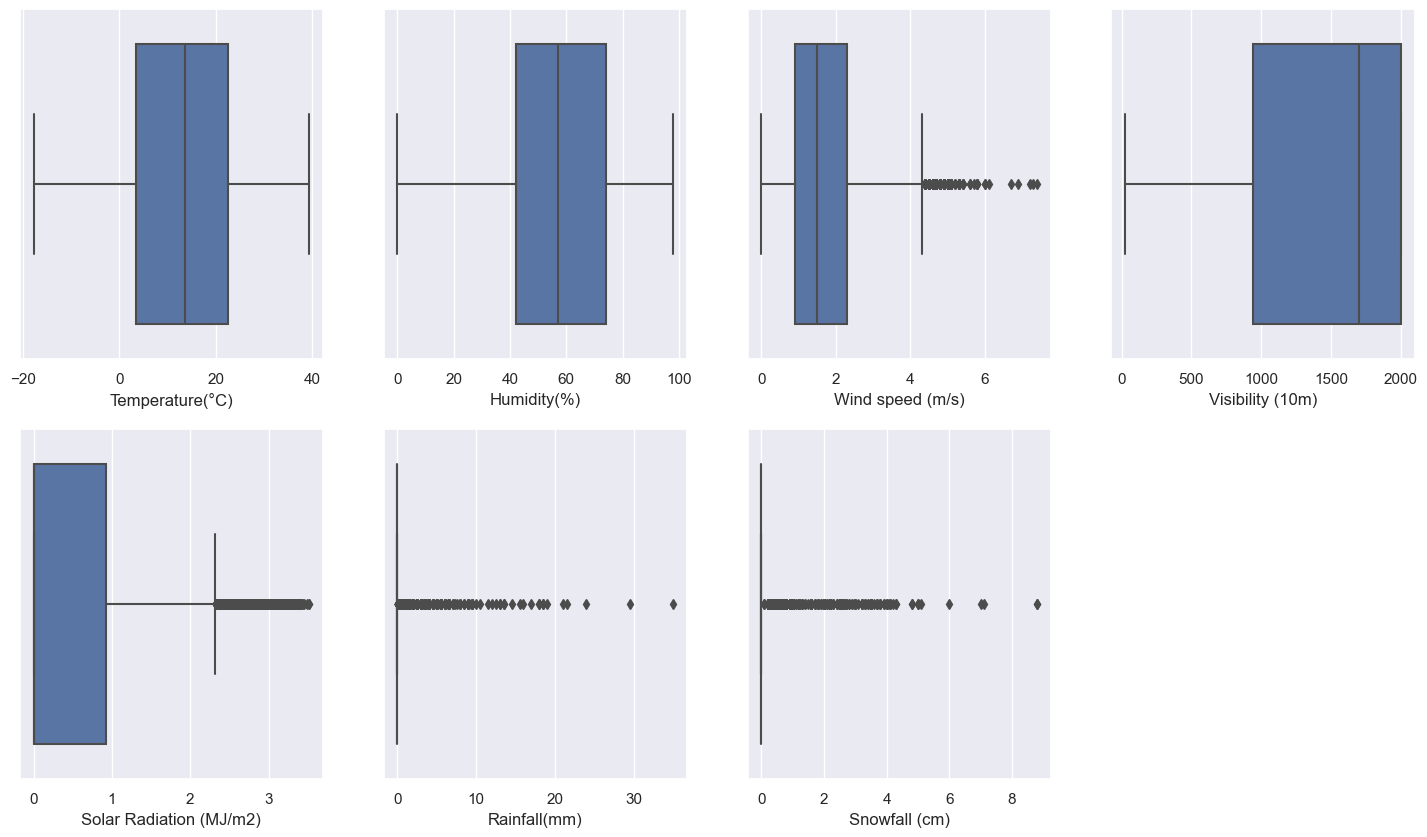

In [171]:
#Plotting boxplot for outliers in each numerical features
sns.set(rc={"figure.figsize": (18, 10)})
subplot(2,4,1)
sns.boxplot(x=bike_df['Temperature(°C)'])
subplot(2,4,2)
sns.boxplot(x=bike_df['Humidity(%)'])
subplot(2,4,3)
sns.boxplot(x=bike_df['Wind speed (m/s)'])
subplot(2,4,4)
sns.boxplot(x=bike_df['Visibility (10m)'])
subplot(2,4,5)
sns.boxplot(x=bike_df['Solar Radiation (MJ/m2)'])
subplot(2,4,6)
sns.boxplot(x=bike_df['Rainfall(mm)'])
subplot(2,4,7)
sns.boxplot(x=bike_df['Snowfall (cm)']);

**As we Observed:**
* The highest number of outliers among all are found in **snowfall** and **rainfall**.
* Both wind speed and solar radiation constitute a substantial quantity of outliers.

**These outliers will be rectify in our analysis ahead.**

**Handling Outliers**

In [172]:
#Outlier treatment:

df1 = bike_df.copy()

features1 = numerical_features

for i in features1:
    Q1 = df1[i].quantile(0.25)
    Q3 = df1[i].quantile(0.75)
    IQR = Q3 - Q1
    upper_limit = (Q3+(1.5*IQR))
    lower_limit = (Q1-(1.5*IQR))
    df1 = df1[(df1[i] >= lower_limit) & (df1[i] <= upper_limit)]
   
    df1 = df1.reset_index(drop=True)
print('Inference: \nBefore removal of outliers, The dataset had {} samples.'.format(bike_df.shape[0]))
print('After removal of outliers, The dataset now has {} samples.'.format(df1.shape[0]))

Inference: 
Before removal of outliers, The dataset had 8760 samples.
After removal of outliers, The dataset now has 7006 samples.


**We have 1694 Outliers in our dataset.**

**We did not removed any outliers but treated them with IQR method because we have low observations in our dataset.**

**We can use Trimming and Capping for outlier treatment.** 

# **Encoding features**

In [173]:
#Mapping the Variables
bike_df['Isfunc_day']=bike_df['Functioning Day'].map({'Yes':1,'No':0})
bike_df['Isholiday']=bike_df['Holiday'].map({'No Holiday':0,'Holiday':1})

**Mapped the categorical variable, Yes as '1' & No as '0'.**

In [174]:
#Converting column Seasons into dummy variables
seasons=pd.get_dummies(bike_df['Seasons'],drop_first= True)
bike_df=pd.concat([bike_df,seasons],axis='columns')

**Seasons column has 4 labels, therefore we used get_dummies for encoding them.**

In [175]:
#Dropping unwanted transformed features.
bike_df.drop(['Functioning Day','Date','Seasons','Holiday'],axis=1,inplace=True)
bike_df

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),month,year,day,Isfunc_day,Isholiday,Spring,Summer,Winter
0,254,0,-5.2,37,2.2,2000,0.0,0.0,0.0,1,2017,12,1,0,0,0,1
1,204,1,-5.5,38,0.8,2000,0.0,0.0,0.0,1,2017,12,1,0,0,0,1
2,173,2,-6.0,39,1.0,2000,0.0,0.0,0.0,1,2017,12,1,0,0,0,1
3,107,3,-6.2,40,0.9,2000,0.0,0.0,0.0,1,2017,12,1,0,0,0,1
4,78,4,-6.0,36,2.3,2000,0.0,0.0,0.0,1,2017,12,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,1003,19,4.2,34,2.6,1894,0.0,0.0,0.0,11,2018,30,1,0,0,0,0
8756,764,20,3.4,37,2.3,2000,0.0,0.0,0.0,11,2018,30,1,0,0,0,0
8757,694,21,2.6,39,0.3,1968,0.0,0.0,0.0,11,2018,30,1,0,0,0,0
8758,712,22,2.1,41,1.0,1859,0.0,0.0,0.0,11,2018,30,1,0,0,0,0


In [176]:
#some of the variables are not float
bike_df = bike_df.astype(float)
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Rented Bike Count        8760 non-null   float64
 1   Hour                     8760 non-null   float64
 2   Temperature(°C)          8760 non-null   float64
 3   Humidity(%)              8760 non-null   float64
 4   Wind speed (m/s)         8760 non-null   float64
 5   Visibility (10m)         8760 non-null   float64
 6   Solar Radiation (MJ/m2)  8760 non-null   float64
 7   Rainfall(mm)             8760 non-null   float64
 8   Snowfall (cm)            8760 non-null   float64
 9   month                    8760 non-null   float64
 10  year                     8760 non-null   float64
 11  day                      8760 non-null   float64
 12  Isfunc_day               8760 non-null   float64
 13  Isholiday                8760 non-null   float64
 14  Spring                  

# **Model Building**

A machine learning model is a program that can find patterns or make decisions from a previously unseen dataset.The process of running a machine learning algorithm on a dataset (called training data) and optimizing the algorithm to find certain patterns or outputs is called model training. The resulting function with rules and data structures is called the trained machine learning model.


In [177]:
#Defining the independent(X) and dependent(y) variables respectively.
X=bike_df.drop('Rented Bike Count',axis=1)
y=np.sqrt(bike_df['Rented Bike Count'])
y

0       15.937377
1       14.282857
2       13.152946
3       10.344080
4        8.831761
          ...    
8755    31.670175
8756    27.640550
8757    26.343880
8758    26.683328
8759    24.166092
Name: Rented Bike Count, Length: 8760, dtype: float64

In [178]:
X

,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),month,year,day,Isfunc_day,Isholiday,Spring,Summer,Winter
0,0.0,-5.2,37.0,2.2,2000.0,0.0,0.0,0.0,1.0,2017.0,12.0,1.0,0.0,0.0,0.0,1.0
1,1.0,-5.5,38.0,0.8,2000.0,0.0,0.0,0.0,1.0,2017.0,12.0,1.0,0.0,0.0,0.0,1.0
2,2.0,-6.0,39.0,1.0,2000.0,0.0,0.0,0.0,1.0,2017.0,12.0,1.0,0.0,0.0,0.0,1.0
3,3.0,-6.2,40.0,0.9,2000.0,0.0,0.0,0.0,1.0,2017.0,12.0,1.0,0.0,0.0,0.0,1.0
4,4.0,-6.0,36.0,2.3,2000.0,0.0,0.0,0.0,1.0,2017.0,12.0,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,19.0,4.2,34.0,2.6,1894.0,0.0,0.0,0.0,11.0,2018.0,30.0,1.0,0.0,0.0,0.0,0.0
8756,20.0,3.4,37.0,2.3,2000.0,0.0,0.0,0.0,11.0,2018.0,30.0,1.0,0.0,0.0,0.0,0.0
8757,21.0,2.6,39.0,0.3,1968.0,0.0,0.0,0.0,11.0,2018.0,30.0,1.0,0.0,0.0,0.0,0.0
8758,22.0,2.1,41.0,1.0,1859.0,0.0,0.0,0.0,11.0,2018.0,30.0,1.0,0.0,0.0,0.0,0.0


**Here, We have transformed our dependent variable with square root transformation to feed into the model.**

In [44]:
#Train test split.
X_train, X_test, y_train, y_test = train_test_split( X,y , test_size = 0.2, random_state = 0) 
print(X_train.shape)
print(X_test.shape)

(7008, 16)
(1752, 16)


**Splitting data into 80% train set and 20% test set.**

In [45]:
# #Feature Scaling (Standardization)

std = StandardScaler()

print('Standardardization on Training set:')
X_train = std.fit_transform(X_train)
X_train = pd.DataFrame(X_train, columns=X.columns)
display(X_train.describe())

print('Standardardization on Training set:')
X_test = std.transform(X_test)
X_test = pd.DataFrame(X_test, columns=X.columns)
display(X_test.describe())

Standardardization on Training set:


,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),month,year,day,Isfunc_day,Isholiday,Spring,Summer,Winter
count,7.008000e+03,7.008000e+03,7.008000e+03,7.008000e+03,7.008000e+03,7.008000e+03,7.008000e+03,7.008000e+03,7.008000e+03,7.008000e+03,7.008000e+03,7.008000e+03,7.008000e+03,7.008000e+03,7.008000e+03,7.008000e+03
mean,-1.376372e-16,7.762690e-18,4.603750e-17,2.504656e-16,1.992952e-16,3.689971e-16,-2.764072e-16,7.400299e-16,5.554284e-17,-2.961880e-13,2.922890e-17,3.768073e-17,-1.601221e-15,1.143809e-16,2.029706e-16,7.956915e-16
std,1.000071e+00,1.000071e+00,1.000071e+00,1.000071e+00,1.000071e+00,1.000071e+00,1.000071e+00,1.000071e+00,1.000071e+00,1.000071e+00,1.000071e+00,1.000071e+00,1.000071e+00,1.000071e+00,1.000071e+00,1.000071e+00
min,-1.657637e+00,-2.560454e+00,-2.860974e+00,-1.658193e+00,-2.305680e+00,-6.551771e-01,-1.271352e-01,-1.726937e-01,-1.606254e+00,-3.307366e+00,-1.671014e+00,-5.478033e+00,-2.320228e-01,-5.786684e-01,-5.791078e-01,-5.711987e-01
25%,-7.914822e-01,-7.980295e-01,-7.942122e-01,-7.934278e-01,-8.114504e-01,-6.551771e-01,-1.271352e-01,-1.726937e-01,-7.351330e-01,3.023554e-01,-8.777448e-01,1.825473e-01,-2.320228e-01,-5.786684e-01,-5.791078e-01,-5.711987e-01
50%,7.467202e-02,7.065369e-02,-5.608294e-02,-2.169179e-01,4.282677e-01,-6.437509e-01,-1.271352e-01,-1.726937e-01,1.359884e-01,3.023554e-01,2.884850e-02,1.825473e-01,-2.320228e-01,-5.786684e-01,-5.791078e-01,-5.711987e-01
75%,7.964673e-01,8.056933e-01,7.804636e-01,6.478470e-01,9.241550e-01,4.188803e-01,-1.271352e-01,-1.726937e-01,1.007110e+00,3.023554e-01,8.221176e-01,1.825473e-01,-2.320228e-01,1.728105e+00,1.726794e+00,-5.711987e-01
max,1.662622e+00,2.208951e+00,1.961470e+00,5.452096e+00,9.241550e-01,3.366825e+00,3.039127e+01,1.984251e+01,1.587857e+00,3.023554e-01,1.728711e+00,1.825473e-01,4.309921e+00,1.728105e+00,1.726794e+00,1.750704e+00


Standardardization on Training set:


,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),month,year,day,Isfunc_day,Isholiday,Spring,Summer,Winter
count,1752.000000,1752.000000,1752.000000,1752.000000,1752.000000,1752.000000,1752.000000,1752.000000,1752.000000,1752.000000,1752.000000,1752.000000,1752.000000,1752.000000,1752.000000,1752.000000
mean,0.012463,0.012027,0.021297,-0.004072,-0.002916,-0.024515,0.012567,-0.009769,-0.008204,-0.021119,-0.014101,-0.040387,-0.040183,0.013825,0.010529,0.006626
std,0.996618,0.988474,1.009816,0.978440,0.994145,0.962379,0.915671,0.966285,1.006075,1.031321,0.984234,1.101330,0.913784,1.008107,1.006256,1.004165
min,-1.657637,-2.535396,-2.860974,-1.658193,-2.315532,-0.655177,-0.127135,-0.172694,-1.606254,-3.307366,-1.671014,-5.478033,-0.232023,-0.578668,-0.579108,-0.571199
25%,-0.935841,-0.733296,-0.745004,-0.697343,-0.844701,-0.655177,-0.127135,-0.172694,-1.025507,0.302355,-0.877745,0.182547,-0.232023,-0.578668,-0.579108,-0.571199
50%,-0.069687,0.108241,-0.006874,-0.216918,0.426626,-0.643751,-0.127135,-0.172694,0.135988,0.302355,0.028849,0.182547,-0.232023,-0.578668,-0.579108,-0.571199
75%,0.940826,0.805693,0.829672,0.551762,0.922513,0.361750,-0.127135,-0.172694,1.007110,0.302355,0.822118,0.182547,-0.232023,1.728105,1.726794,-0.571199
max,1.662622,2.217303,1.961470,4.971671,0.924155,3.275416,16.004024,15.975933,1.587857,0.302355,1.728711,0.182547,4.309921,1.728105,1.726794,1.750704


**Scaling is a step of Data Pre Processing that is applied to independent variables or features of data. It basically helps to normalize the data within a particular range.**

**We use standardscaler here which has its value fit in Gaussian distribution.**

In [46]:
#Creating DataFrames of test and train dataset
train_df = pd.DataFrame(X_train,y_train)
test_df = pd.DataFrame(y_test)
test_df.rename(columns = {'Rented Bike Count':'Actual Count'},inplace = True)

**With the aid of the above code, we will compare our actual values with the predicted values ahead.**

## **Modelling**

*Linear Regression* : Linear regression is used to identify relationships between the variable of interest and the inputs, and predict its values based on the values of the input variables.

In [47]:
#Fitting linear regression model. 
reg = LinearRegression()
reg.fit(X_train,y_train)
#Check regression score.
lin_train_pred = reg.predict(X_train)
lin_train_r2score = r2_score((lin_train_pred), (y_train))*100
print(lin_train_r2score)

47.037705347022026


In [48]:
#Predicting on testing dataset
y_pred = reg.predict(X_test)
y_pred

array([18.24677867, 25.06504448, 19.66960168, ..., 14.21265783,
       32.56548443, 20.53254918])

In [49]:
#Check Intercept.
reg.intercept_

23.550115598397316

In [50]:
#Check coefficient values.
coef_= reg.coef_
coef_

array([ 3.38204332e+00,  5.62976936e+00, -3.30040169e+00,  1.38485756e-01,
        1.15502762e-01, -7.40960178e-01, -1.69758116e+00,  1.49509429e-03,
       -3.90394058e-02, -6.63042450e-01, -8.16232968e-02,  5.02320650e+00,
       -6.51171316e-01, -1.29799023e+00, -1.20198736e+00, -3.86133646e+00])

In [51]:
#Add feature list and their respective coefficient into Dataframe.
res= {X.columns[i]: coef_[i] for i in range(len(X.columns))}
a= pd.DataFrame.from_dict(res, orient='index').sort_values(by= 0 , ascending=False)

a

,0
Temperature(°C),5.629769
Isfunc_day,5.023206
Hour,3.382043
Wind speed (m/s),0.138486
Visibility (10m),0.115503
Snowfall (cm),0.001495
month,-0.039039
day,-0.081623
Isholiday,-0.651171
year,-0.663042


In [52]:
#Defining a function determine mean absolute percentage error.
def percentage_error(actual, predicted):
    res = np.empty(actual.shape)
    for j in range(actual.shape[0]):
        if actual[j] != 0:
            res[j] = (actual[j] - predicted[j]) / actual[j]
        else:
            res[j] = predicted[j] / np.mean(actual)
    return res

def mean_absolute_percentage_error(y_true, y_pred): 
    return np.mean(np.abs(percentage_error(np.asarray(y_true), np.asarray(y_pred)))) * 100

In the above code we defined a function which helps us to calculate mean absolute percentage error of our model. The lower the percentage, the more accurate the model, so 10% is better than 60%.

a general rule of thumb that I follow is:

MAPE :	Interpretation

=< 10 % :	Very good

10 % - 20 % :	Good

20 % - 50 % :	OK

=> 50 % :	Not good



In [53]:
#Regression Evaluation Metrics for Linear Regression
#Calculating MSE, RMSE,MAPE, r2_score and Adjusted_r2
MSE  = mean_squared_error((y_test), (y_pred))
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

MAPE= mean_absolute_percentage_error(y_test, y_pred)
print("MAPE : ",MAPE)

print(f'Train R2_Score : {lin_train_r2score}')

r2 = r2_score((y_test), (y_pred))*100
print("R2 :" ,r2)
print("Adjusted R2 : ",(1-(1-r2_score((y_test), (y_pred)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))*100)

MSE : 54.168512231883845
RMSE : 7.359926102338518
MAPE :  34.679029633926255
Train R2_Score : 47.037705347022026
R2 : 65.60429258862041
Adjusted R2 :  65.28709874505726


In [54]:
from sklearn.feature_selection import mutual_info_regression
# determine the mutual information/Feature Importance.
mutual_info = mutual_info_regression(X_train, y_train)
mutual_info = pd.Series(mutual_info)
mutual_info.index = X_train.columns
mutual_info.sort_values(ascending=False)

Temperature(°C)            0.387081
Hour                       0.343284
Winter                     0.201966
Solar Radiation (MJ/m2)    0.189408
day                        0.181854
Isfunc_day                 0.148537
month                      0.135441
Humidity(%)                0.102391
Rainfall(mm)               0.077001
Summer                     0.063632
year                       0.059750
Visibility (10m)           0.057700
Snowfall (cm)              0.055521
Wind speed (m/s)           0.026316
Spring                     0.018999
Isholiday                  0.000000
dtype: float64

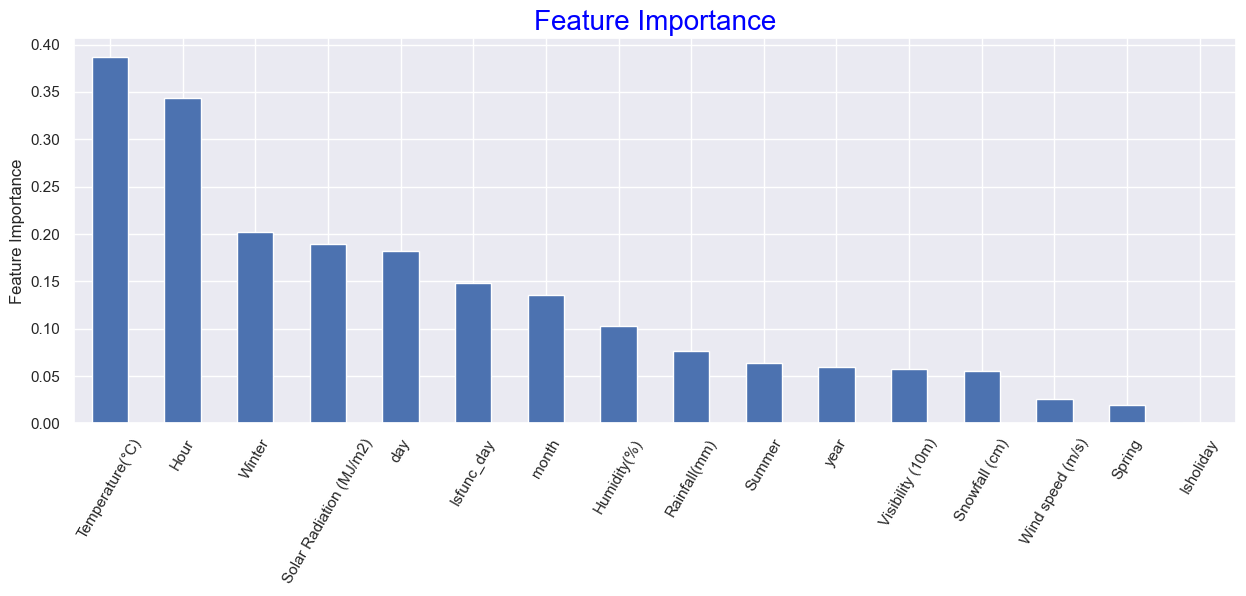

In [55]:
#Feature Importance Plot.
mutual_info.sort_values(ascending=False).plot.bar(figsize=(15,5))
plt.title('Feature Importance',fontsize=20, color = 'blue')
plt.xticks(rotation=60)
plt.ylabel("Feature Importance");


**Observations:**

* After implementing the linear regression algorithm, we obtain a **R2 score of 65.60 %**, which is considered appropriate but we have also seen **MAPE as 34.67%**, which needs to be reduce further. Therefore, we will now attempt to maximize our R2 score and reduce MAPE% by introducing more regression algorithms to our dataset.
* For a linear regression model, the **Temperature** feature seems to be very significant following **Hour** and **Winter**.

## Lasso regression

This is a regularization technique used in feature selection using a Shrinkage method also referred to as the penalized regression method. Lasso is short for Least Absolute Shrinkage and Selection Operator, which is used both for regularization and model selection. If a model uses the L1 regularization technique, then it is called lasso regression.

In [56]:
#Implementing fit to our dataset.
lasso  = Lasso(alpha=0.0001 , max_iter= 3000)
lasso.fit(X_train, y_train)
#Check regression score.
lass_train_pred = lasso.predict(X_train)
lass_train_r2score = r2_score((lass_train_pred), (y_train))*100
print(lass_train_r2score)

47.03478511599691


In [57]:
#Print coefficients
lasso.coef_

array([ 3.38207473e+00,  5.62926840e+00, -3.30000355e+00,  1.38305645e-01,
        1.15610364e-01, -7.40515018e-01, -1.69750746e+00,  1.30285173e-03,
       -3.85706827e-02, -6.62537110e-01, -8.13655732e-02,  5.02298126e+00,
       -6.51030825e-01, -1.29741017e+00, -1.20137967e+00, -3.86061536e+00])

In [58]:
### Cross validation
lasso = Lasso()
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100,0.0014]}
lasso_regressor = GridSearchCV(lasso, parameters, scoring='neg_mean_squared_error', cv=5)
lasso_regressor.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45,
                                   50, 55, 60, 100, 0.0014]},
             scoring='neg_mean_squared_error')

In [59]:
print("The best fit alpha value is found out to be : " ,lasso_regressor.best_params_)
print("Using ",lasso_regressor.best_params_, " the negative mean squared error is: ", lasso_regressor.best_score_)

The best fit alpha value is found out to be :  {'alpha': 0.01}
Using  {'alpha': 0.01}  the negative mean squared error is:  -53.71883924830502


In [60]:
y_pred_lasso = lasso_regressor.predict(X_test)
y_pred_lasso

array([18.28994819, 24.98379443, 19.54943708, ..., 14.28245631,
       32.51659083, 20.49058208])

In [61]:
#Regression Evaluation Metrics for Lasso Regression
#Calculating MSE, RMSE,MAPE, r2_score and Adjusted_r2
MSE  = mean_squared_error((y_test), (y_pred_lasso))
print("MSE :" , MSE)

RMSE_lasso = np.sqrt(MSE)
print("RMSE :" ,RMSE_lasso)

MAPE_lasso= mean_absolute_percentage_error(y_test, y_pred_lasso)
print("MAPE : ",MAPE_lasso)

print(f'Train R2_Score: {lass_train_r2score}')

r2_lasso = r2_score((y_test), (y_pred_lasso))*100
print("R2  :" ,r2_lasso)
print("Adjusted R2 : ",(1-(1-r2_score((y_test), (y_pred_lasso)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))*100)

MSE : 54.21653485216073
RMSE : 7.363187818612311
MAPE :  34.72821747096407
Train R2_Score: 47.03478511599691
R2  : 65.57379937534735
Adjusted R2 :  65.2563243263592


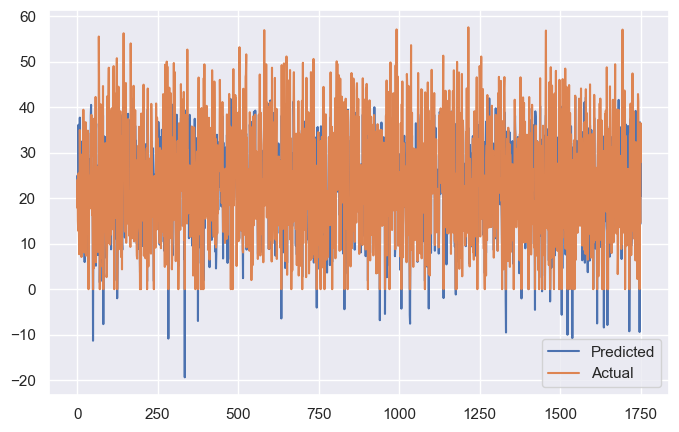

In [62]:
#Check performance of the model through plot.
plt.figure(figsize=(8,5))
plt.plot((y_pred_lasso))
plt.plot((np.array(y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

**Observations:**

* After implementing the lasso regression algorithm, we obtain a **R2 score of 65.59 %**, which is considered appropriate but we have also seen **MAPE as 34.69%**, which needs to be reduce further. Therefore, we will now attempt to maximize our R2 score and reduce MAPE% by introducing more regression algorithms to our dataset.
* For a linear regression model, the **Temperature** feature seems to be very significant following **Hour** and **Winter**.

# Ridge regression

Similar to the lasso regression, ridge regression puts a similar constraint on the coefficients by introducing a penalty factor. However, while lasso regression takes the magnitude of the coefficients, ridge regression takes the square.
Ridge regression is also referred to as L2 Regularization.

In [63]:
#Implement ridge regression to our dataset.
ridge = Ridge()
parameters = {'alpha': [1e-15,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1,5,10,20,30,40,45,50,55,60,100]}
ridge_regressor = GridSearchCV(ridge, parameters, scoring='neg_mean_squared_error', cv=3)
ridge_regressor.fit(X_train,y_train)

GridSearchCV(cv=3, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 1e-05, 0.0001, 0.001,
                                   0.01, 1, 5, 10, 20, 30, 40, 45, 50, 55, 60,
                                   100]},
             scoring='neg_mean_squared_error')

In [64]:
print("The best fit alpha value is found out to be : " ,ridge_regressor.best_params_)
print("Using ",ridge_regressor.best_params_, " the negative mean squared error is: ", ridge_regressor.best_score_)

The best fit alpha value is found out to be :  {'alpha': 5}
Using  {'alpha': 5}  the negative mean squared error is:  -53.688332459328386


In [65]:
y_pred_ridge = ridge_regressor.predict(X_test)

In [66]:
#Regression Evaluation Metrics for Ridge Regression
#Calculating MSE, RMSE,MAPE, r2_score and Adjusted_r2
MSE  = mean_squared_error((y_test), (y_pred_ridge))
print("MSE :" , MSE)

RMSE_ridge = np.sqrt(MSE)
print("RMSE :" ,RMSE_ridge)

MAPE_ridge= mean_absolute_percentage_error(y_test, y_pred_ridge)
print("MAPE : ",MAPE_ridge)

r2_ridge = r2_score((y_test), (y_pred_ridge))*100
print("R2 :" ,r2_ridge)
print("Adjusted R2 : ",(1-(1-r2_score((y_test), (y_pred_ridge)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))*100)

MSE : 54.17611848913808
RMSE : 7.360442818821302
MAPE :  34.68701185041224
R2 : 65.59946279750686
Adjusted R2 :  65.28222441408329


## Elastic net

Sometimes, the lasso regression can cause a small bias in the model where the prediction is too dependent upon a particular variable. In these cases, elastic Net is proved to better it combines the regularization of both lasso and Ridge. The advantage of that it does not easily eliminate the high collinearity coefficient.

In [67]:
#a * L1 + b * L2
#alpha = a + b and l1_ratio = a / (a + b)
elasticnet = ElasticNet(alpha=0.001, l1_ratio=1)
#Fitting the elasticnet.
elasticnet.fit(X_train,y_train)
#Check regression score.
en_train_pred = elasticnet.predict(X_train)
en_train_r2score = r2_score((en_train_pred), (y_train))*100
print(en_train_r2score)

47.008434600842804


In [68]:
y_pred_en = elasticnet.predict(X_test)

In [69]:
#Regression Evaluation Metrics for Elasticnet Regression
#Calculating MSE, RMSE,MAPE, r2_score and Adjusted_r2
MSE  = mean_squared_error((y_test), (y_pred_en))
print("MSE :" , MSE)

RMSE_elasticnet = np.sqrt(MSE)
print("RMSE :" ,RMSE_elasticnet)

MAPE_en= mean_absolute_percentage_error(y_test, y_pred_en)
print("MAPE : ",MAPE_en)

print(f'Train R2_Score : {en_train_r2score}')

r2_elasticnet = r2_score((y_test), (y_pred_en))*100
print("R2 :" ,r2_elasticnet)
print("Adjusted R2 : ",(1-(1-r2_score((y_test), (y_pred_en)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))*100)

MSE : 54.17321931536205
RMSE : 7.360245873295406
MAPE :  34.68454149214561
Train R2_Score : 47.008434600842804
R2 : 65.6013037033916
Adjusted R2 :  65.28408229662172


In [70]:
#Cross Validation
elastic = ElasticNet()
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100],'l1_ratio':[0.3,0.4,0.5,0.6,0.7,0.8]}
elastic_regressor = GridSearchCV(elastic, parameters, scoring='neg_mean_squared_error',cv=5)
elastic_regressor.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=ElasticNet(),
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45,
                                   50, 55, 60, 100],
                         'l1_ratio': [0.3, 0.4, 0.5, 0.6, 0.7, 0.8]},
             scoring='neg_mean_squared_error')

In [71]:
print("The best fit alpha value is found out to be :" ,elastic_regressor.best_params_)
print("Using ",elastic_regressor.best_params_, " the negative mean squared error is: ", elastic_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 0.001, 'l1_ratio': 0.8}
Using  {'alpha': 0.001, 'l1_ratio': 0.8}  the negative mean squared error is:  -53.72084780259007


In [72]:
y_pred_elastic = elastic_regressor.predict(X_test)

In [73]:
#Regression Evaluation Metrics for Elasticnet cv Regression
#Calculating MSE, RMSE,MAPE, r2_score and Adjusted_r2
MSE  = mean_squared_error((y_test), (y_pred_elastic))
print("MSE :" , MSE)

RMSE_elasticnet_cv = np.sqrt(MSE)
print("RMSE :" ,RMSE_elasticnet_cv)

MAPE_elasticnet_cv= mean_absolute_percentage_error(y_test, y_pred_elastic)
print("MAPE : ",MAPE_elasticnet_cv)

r2_elasticnet_cv = r2_score((y_test), (y_pred_elastic))*100
print("R2 :" ,r2_elasticnet_cv)
print("Adjusted R2 : ",(1-(1-r2_score((y_test), (y_pred_elastic)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))*100)

MSE : 54.17435546220105
RMSE : 7.360323054200886
MAPE :  34.68556564366838
R2 : 65.60058227737045
Adjusted R2 :  65.28335421768048


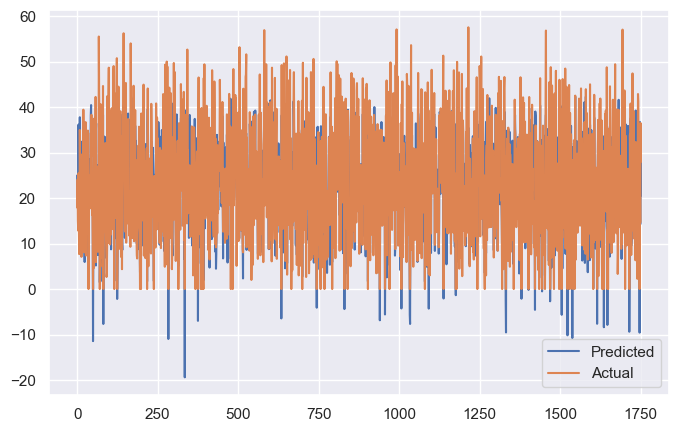

In [74]:
#Check performance of the model through plot.
plt.figure(figsize=(8,5))
plt.plot((y_pred_elastic))
plt.plot((np.array(y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

**Hence, we observed before in EDA that our dataset is non-linear. Therefore the performance of above linear models are intuitive enough to try on tree-based algorithm ahead for our analysis.**

## Decision tree

In [75]:
from sklearn.tree import DecisionTreeRegressor
#Implementing Decision Tree.
dt_regressor = DecisionTreeRegressor(max_depth= 10, min_samples_leaf= 40 , random_state=0)
dt_regressor.fit(X_train, y_train)
#Check Score
dt_train_pred = dt_regressor.predict(X_train)
dt_train_r2score = r2_score((dt_train_pred), (y_train))*100
print(dt_train_r2score)

85.10415626429435


In [76]:
#Predicting the test data.
y_pred_dt=dt_regressor.predict(X_test)
y_pred_dt

array([15.30794602, 21.80866439, 18.79494865, ..., 22.99634354,
       31.92752417, 22.99634354])

In [77]:
#Regression Evaluation Metrics for Decision Tree
#Calculating MSE, RMSE,MAPE, r2_score and Adjusted_r2
MSE  = mean_squared_error((y_test), (y_pred_dt))
print("MSE :" , MSE)

RMSE_dt = np.sqrt(MSE)
print("RMSE :" ,RMSE_dt)

MAPE_dt= mean_absolute_percentage_error(y_test, y_pred_dt)
print("MAPE : ",MAPE_dt)

print(f'Train R2_Score : {dt_train_r2score}')

r2_dt = r2_score((y_test), (y_pred_dt))*100
print("R2 :" ,r2_dt)
print("Adjusted R2 : ",(1-(1-r2_score((y_test), (y_pred_dt)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))*100)

MSE : 23.916699614524592
RMSE : 4.890470285619226
MAPE :  20.094691202894342
Train R2_Score : 85.10415626429435
R2 : 84.81346877932458
Adjusted R2 :  84.67342007642497


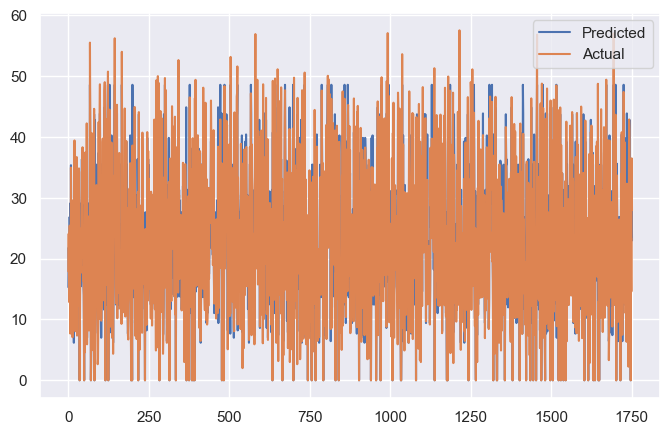

In [78]:
#Check performance of the model through plot.
plt.figure(figsize=(8,5))
plt.plot((y_pred_dt))
plt.plot((np.array(y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

In [79]:
#Compairing predicted data with original data.
test_df['Predicted Count'] = y_pred_dt
dt_df = test_df.loc[:,['Actual Count','Predicted Count']]
dt_df.head(5)

,Actual Count,Predicted Count
4059,17.888544,15.307946
6914,24.083189,21.808664
233,15.033296,18.794949
982,12.845233,15.211957
5967,25.416530,26.851646


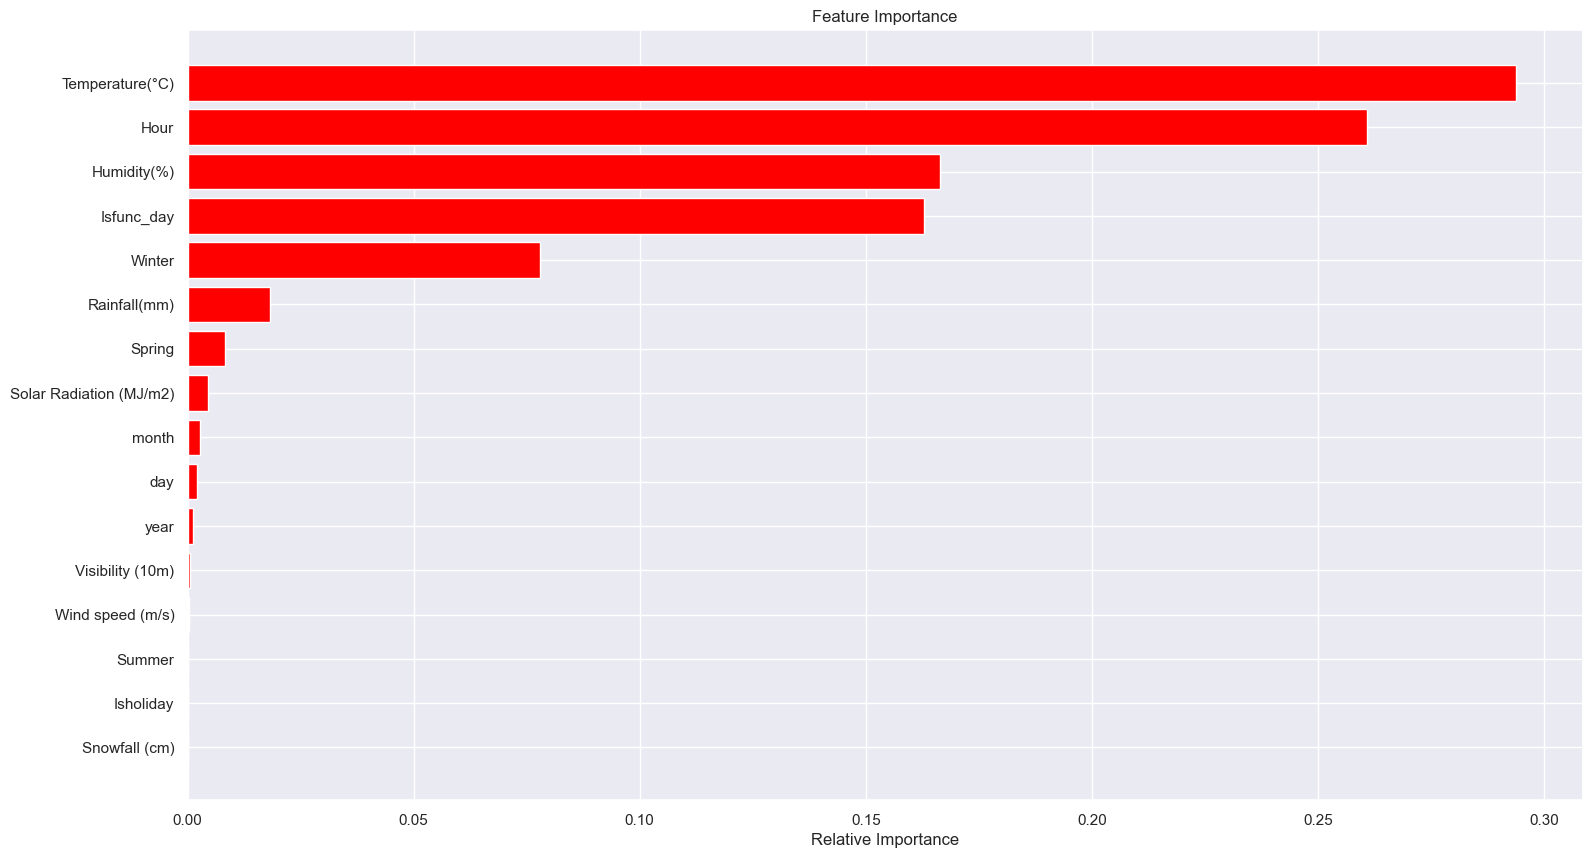

In [80]:
#Feature importance for Decision Tree.
features = X_train.columns
importances = dt_regressor.feature_importances_
indices = np.argsort(importances)
plt.title('Feature Importance')
plt.barh(range(len(indices)), importances[indices], color='red', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

**Observations:**

* After implementing the Decision Tree algorithm, we obtain a **R2 score of 84.81 %** and **MAPE as 20.09%**, both are improved majorly. We will now attempt to maximize our R2 score and minimize MAPE% by introducing more tree-based and boosting algorithms to our dataset.
* For a Decision Tree model, the **Temperature** feature seems to be very significant following **Hour** and **Humidity**.

## Random Forest Regressor

In [81]:
#Implementing the Random Forest Regressor.
from sklearn.ensemble import RandomForestRegressor
rf_regressor = RandomForestRegressor(n_estimators = 10, random_state = 0)
rf_regressor.fit(X_train,y_train)
#Check Score
rf_train_pred = rf_regressor.predict(X_train)
rf_train_r2score = r2_score((rf_train_pred), (y_train))*100
print(rf_train_r2score)

97.92164741668321


In [82]:
#Predicting the test data.
y_pred_rf=rf_regressor.predict(X_test)
y_pred_rf

array([14.87382376, 20.84482423, 21.91399253, ..., 21.89900865,
       33.85370016, 20.29390925])

In [83]:
#Regression Evaluation Metrics for Random Forest Regressor.
#Calculating MSE, RMSE,MAPE, r2_score and Adjusted_r2
MSE  = mean_squared_error((y_test), (y_pred_rf))
print("MSE :" , MSE)

RMSE_rf = np.sqrt(MSE)
print("RMSE :" ,RMSE_rf)

MAPE_rf= mean_absolute_percentage_error(y_test, y_pred_rf)
print("MAPE : ",MAPE_rf)

print(f'Train R2_Score : {rf_train_r2score}')

r2_rf = r2_score((y_test), (y_pred_rf))*100
print("R2 :" ,r2_rf)
print("Adjusted R2 : ",(1-(1-r2_score((y_test), (y_pred_rf)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))*100)

MSE : 16.304687387000623
RMSE : 4.037906312310951
MAPE :  15.445394077308706
Train R2_Score : 97.92164741668321
R2 : 89.6469141630368
Adjusted R2 :  89.55143901987171


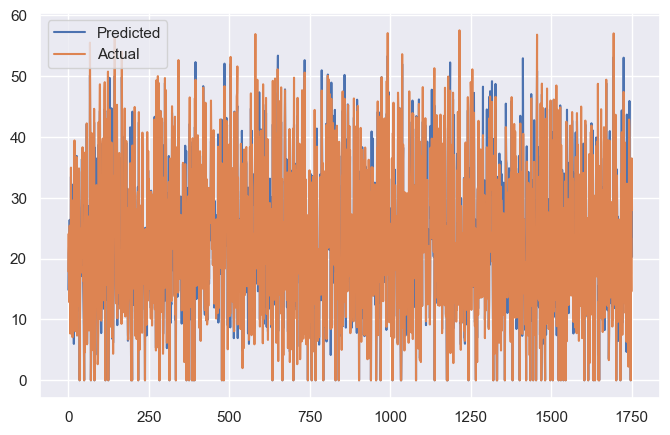

In [84]:
#Check performance of the model through plot.
plt.figure(figsize=(8,5))
plt.plot((y_pred_rf))
plt.plot((np.array(y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

In [85]:
#Compairing predicted data with original data.
test_df['Predicted Count'] = y_pred_rf
rf_df = test_df.loc[:,['Actual Count','Predicted Count']]
rf_df.head(5)

,Actual Count,Predicted Count
4059,17.888544,14.873824
6914,24.083189,20.844824
233,15.033296,21.913993
982,12.845233,12.977293
5967,25.416530,26.368297


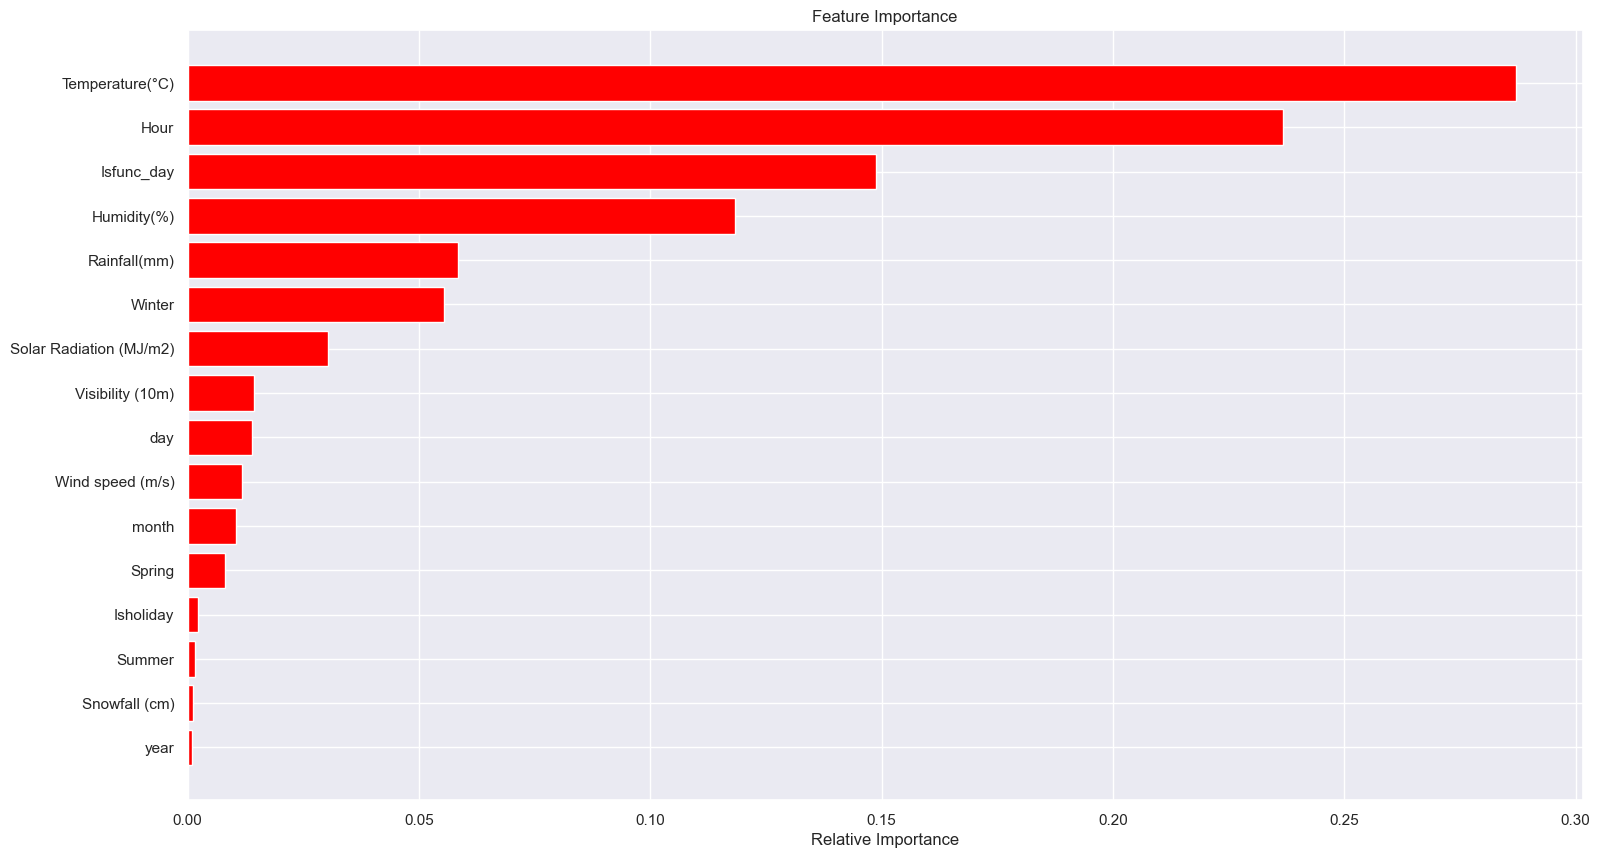

In [86]:
#Feature importance for Decision Tree.
features = X_train.columns
importances = rf_regressor.feature_importances_
indices = np.argsort(importances)
plt.title('Feature Importance')
plt.barh(range(len(indices)), importances[indices], color='red', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')

plt.show()


**Observations:**

* After implementing the Random Forest algorithm, we obtain a **R2 score of 89.64%** and **MAPE as 15.42%** , both can be considered as better. We will now attempt to maximize our R2 score and minimize MAPE% by introducing more boosting algorithms to our dataset.
* For a Random Forest model, the **Temperature** feature seems to be very significant following **Hour** and **Humidity**.

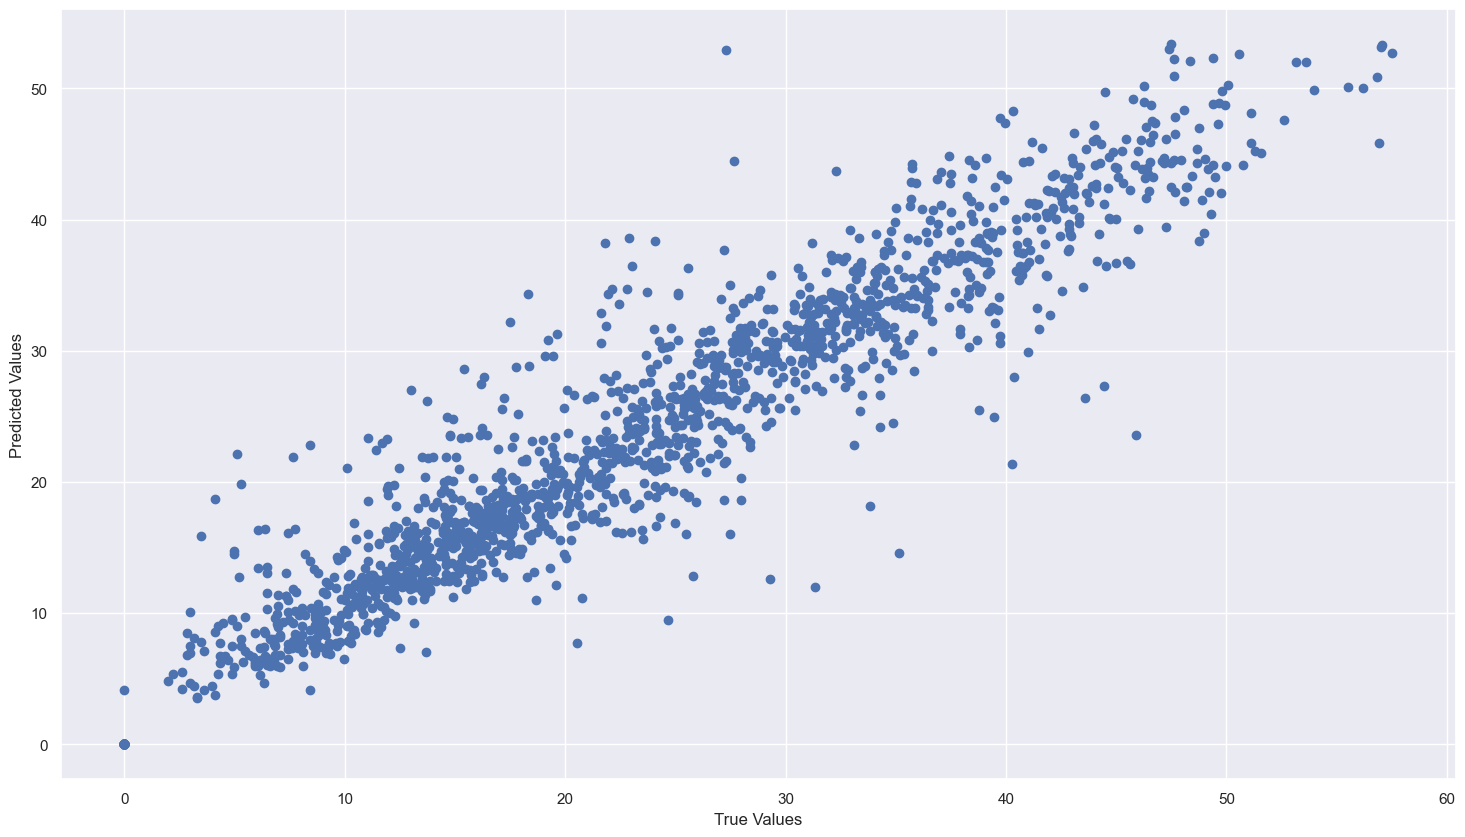

In [87]:
#Analysing True values and Predicted Values of random forest
plt.scatter(y_test,y_pred_rf)
plt.xlabel('True Values'), plt.ylabel('Predicted Values')
plt.show()

***Above plot shows the perfect linear relation between true values to predicted values of Test dataset.***

# XG Boosting

In [88]:
#Implementing XG Boosting.
from xgboost import XGBRegressor
xgb_reg = XGBRegressor(objective ='reg:linear',
                  n_estimators=70, max_depth=10, eta=0.08,subsample=0.8, reg_lambda=1.2)
xgb_reg.fit(X_train, y_train)
#Check Score
xgb_train_pred = xgb_reg.predict(X_train)
xgb_train_r2score = r2_score((xgb_train_pred), (y_train))*100
print(xgb_train_r2score)

[20:00:57] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\objective\regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
98.57613318290319


In [89]:
#Predicting the test data.
y_pred_xgb = xgb_reg.predict(X_test)

In [90]:
#Regression Evaluation Metrics for XG Boosting.
#Calculating MSE, RMSE,MAPE, r2_score and Adjusted_r2
MSE  = mean_squared_error((y_test), (y_pred_xgb))
print("MSE :" , MSE)

RMSE_xgb = np.sqrt(MSE)
print("RMSE :" ,RMSE_xgb)

MAPE_xgb= mean_absolute_percentage_error(y_test, y_pred_xgb)
print("MAPE : ",MAPE_xgb)

print(f'Train R2_Score: {xgb_train_r2score}')

r2_xgb = r2_score((y_test), (y_pred_xgb))*100
print("R2 :" ,r2_xgb)
print("Adjusted R2 : ",(1-(1-r2_score((y_test), (y_pred_xgb)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))*100)

MSE : 13.195211912171565
RMSE : 3.632521426250858
MAPE :  13.275694776656199
Train R2_Score: 98.57613318290319
R2 : 91.62135658776576
Adjusted R2 :  91.5440895591803


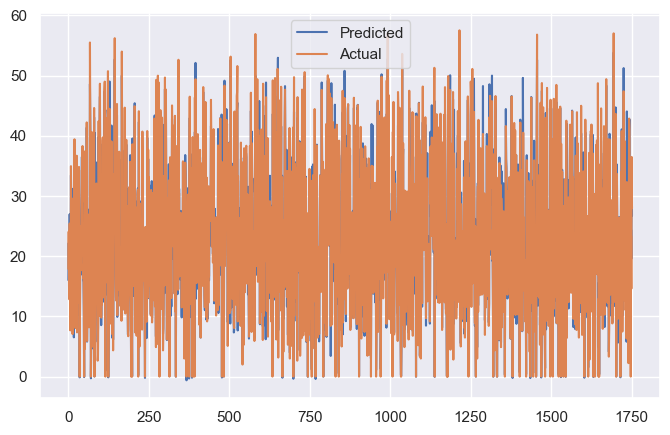

In [91]:
#Check performance of the model through plot.
plt.figure(figsize=(8,5))
plt.plot((y_pred_xgb))
plt.plot((np.array(y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

In [92]:
#Compairing predicted data with original data.
test_df['Predicted Count'] = y_pred_xgb
xgb_df = test_df.loc[:,['Actual Count','Predicted Count']]
xgb_df.head(5)

,Actual Count,Predicted Count
4059,17.888544,16.031370
6914,24.083189,22.182648
233,15.033296,17.168123
982,12.845233,13.357826
5967,25.416530,26.978523


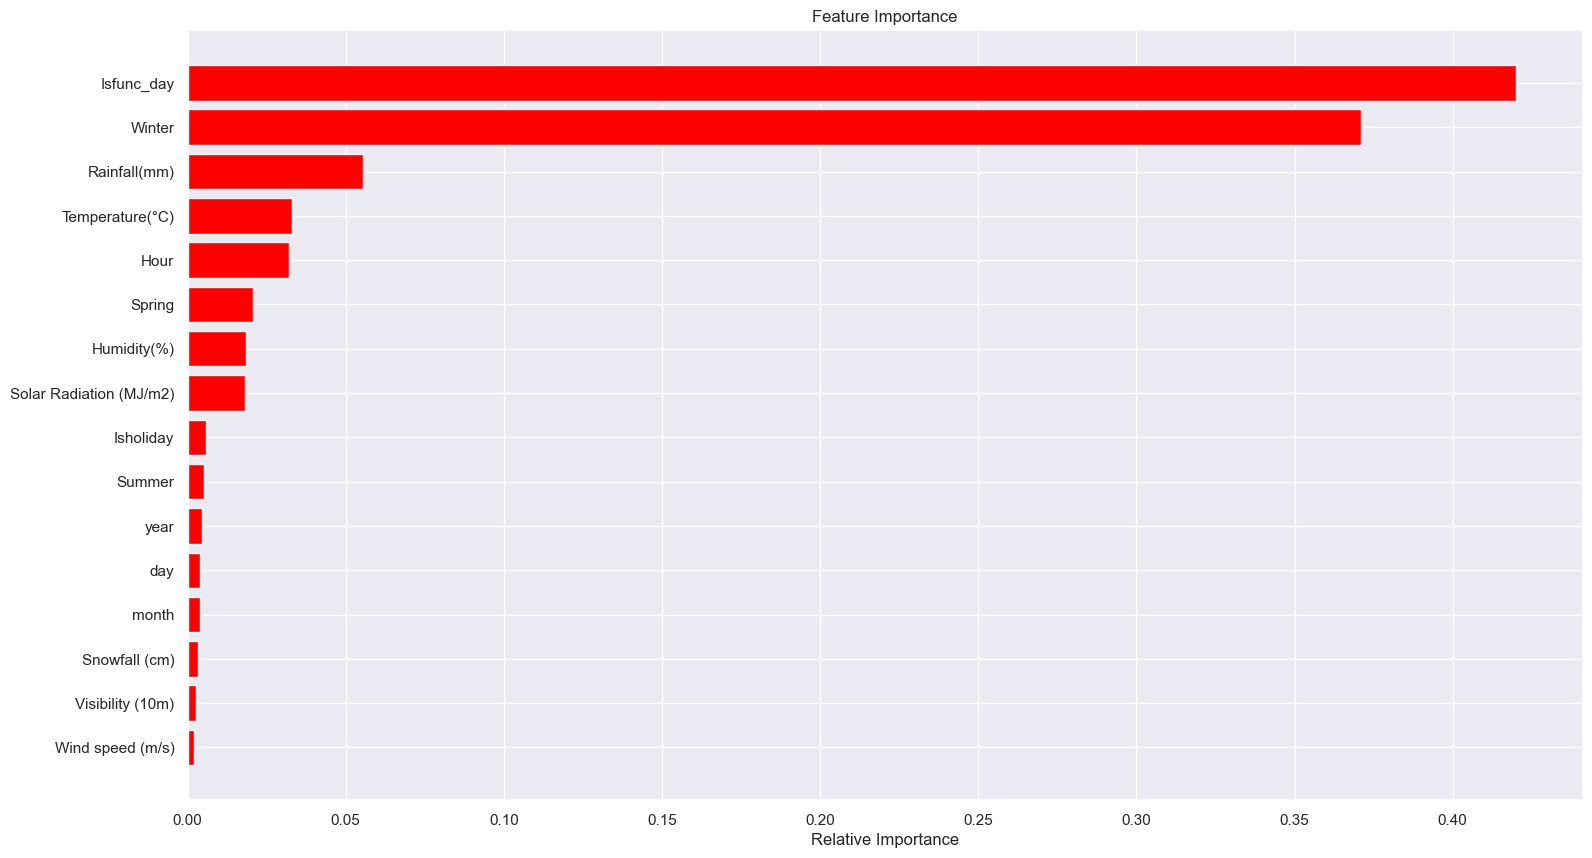

In [93]:
#Feature importance for Decision Tree.
features = X_train.columns
importances = xgb_reg.feature_importances_
indices = np.argsort(importances)
plt.title('Feature Importance')
plt.barh(range(len(indices)), importances[indices], color='red', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')

plt.show()


**Observations:**

* After implementing the XG Boosting algorithm, we obtain a **R2 score of 91.30 %** and **MAPE as 13.43%** , both are best till now. We will now attempt to maximize our R2 score and try to reduce MAPE% more by introducing other boosting algorithms to our dataset.
* For a XG Boosting model, the **Isfunc_day** feature seems to be very significant following Winter and Hour.

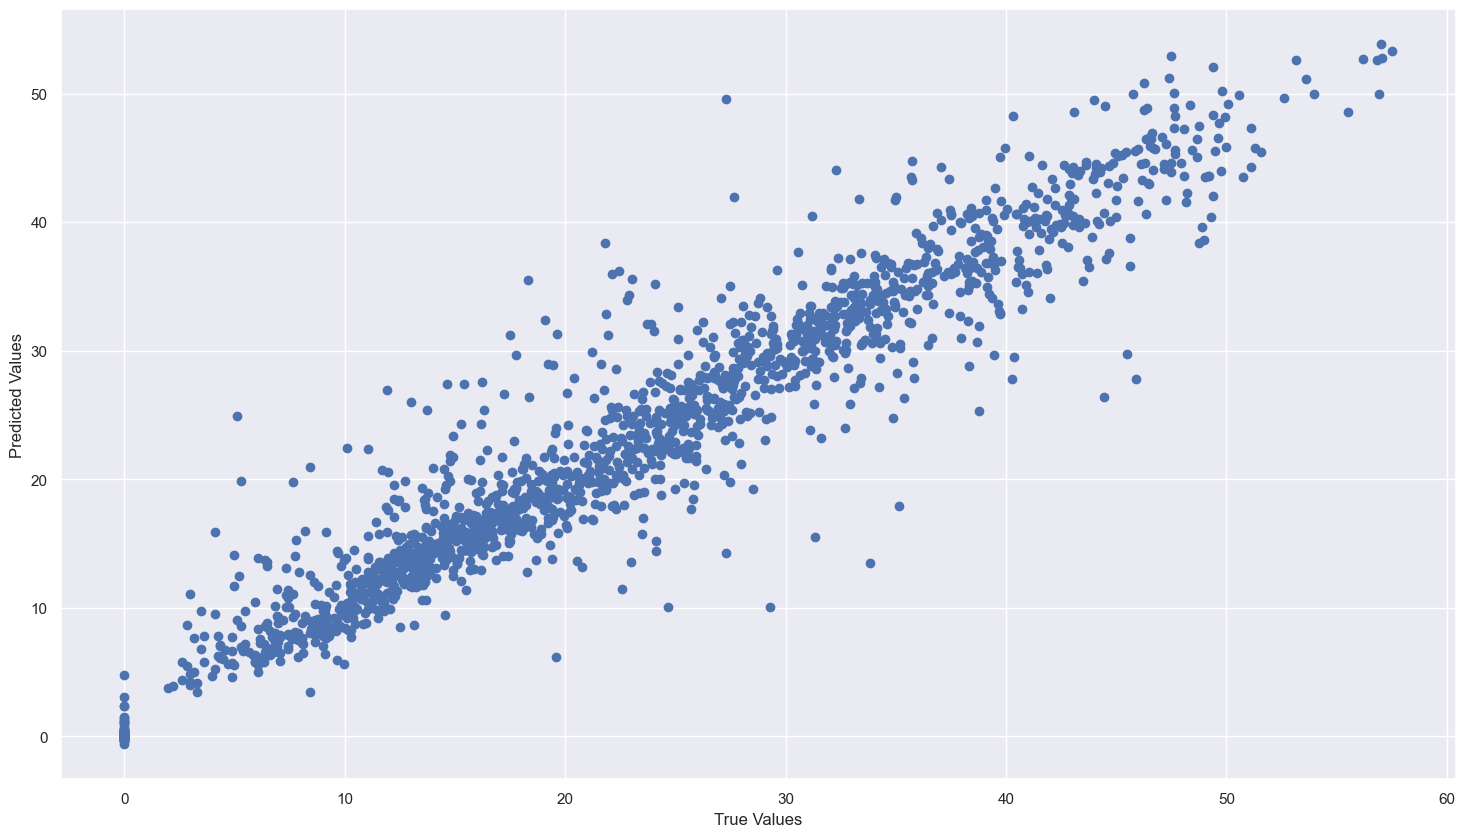

In [94]:
#Analysing True values and Predicted Values
plt.scatter(y_test,y_pred_xgb)
plt.xlabel('True Values'), plt.ylabel('Predicted Values')
plt.show()

## **Comparing evaluation metrics of the models being used.**

##Comparing R square of all the models being used for testing dataset.

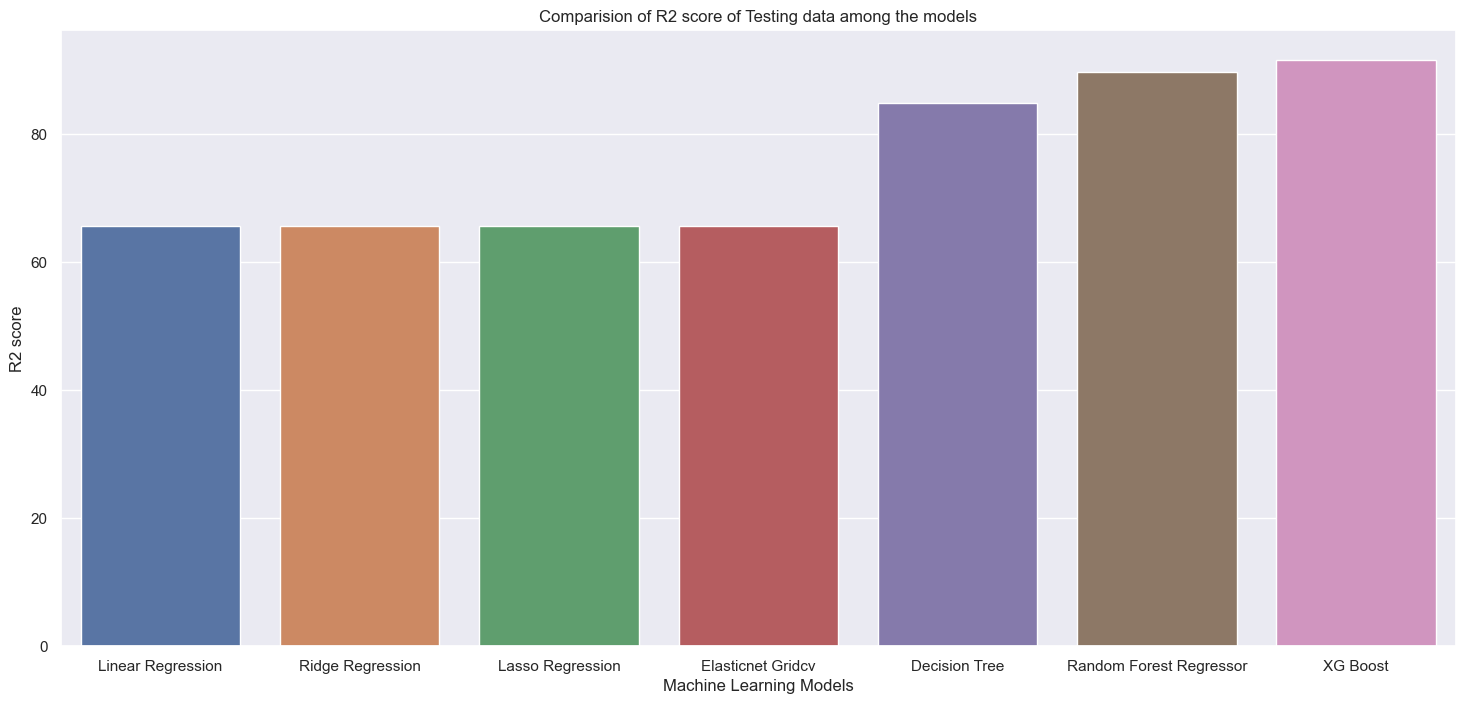

In [95]:
models = ['Linear Regression','Ridge Regression','Lasso Regression','Elasticnet Gridcv','Decision Tree','Random Forest Regressor','XG Boost']
acc = [r2,r2_ridge,r2_lasso,r2_elasticnet_cv,r2_dt,r2_rf,r2_xgb]
plt.figure(figsize=(18,8))

plt.ylabel("R2 score")
plt.xlabel("Machine Learning Models")
sns.barplot(x= models, y= acc)
plt.title('Comparision of R2 score of Testing data among the models')
plt.show()

In [96]:
#Comparing the hypertuned models by adding them into dataframe.
rmse_lst = [RMSE,RMSE_ridge,RMSE_lasso,RMSE_elasticnet_cv,RMSE_dt,RMSE_rf,RMSE_xgb]
mape_lst = [MAPE,MAPE_ridge,MAPE_lasso,MAPE_elasticnet_cv,MAPE_dt,MAPE_rf,MAPE_xgb]
acc_lst = [i/100 for i in acc]
hypertune_evaluation = pd.DataFrame({'Model': models,
                           'RMSE': rmse_lst,
                           'R2_Score': acc_lst,
                           'MAPE' : mape_lst })
print('This dataframe shows hypertuned models evaluation scores:','\n')
hypertune_evaluation

This dataframe shows hypertuned models evaluation scores: 



,Model,RMSE,R2_Score,MAPE
0,Linear Regression,7.359926,0.656043,34.679030
1,Ridge Regression,7.360443,0.655995,34.687012
2,Lasso Regression,7.363188,0.655738,34.728217
3,Elasticnet Gridcv,7.360323,0.656006,34.685566
4,Decision Tree,4.890470,0.848135,20.094691
5,Random Forest Regressor,4.037906,0.896469,15.445394
6,XG Boost,3.632521,0.916214,13.275695


***The XG Boost model, which predicted the data more accurately, came out on top.***

#Let us check R2 scores of our baseline models(without any tuning).

In [97]:
#Comparing the plain vanilla models.
algos = [LinearRegression(),  Ridge(), Lasso(),
           ElasticNet(), DecisionTreeRegressor(), RandomForestRegressor(), XGBRegressor()]

names = ['Linear Regression', 'Ridge Regression', 'Lasso Regression',
          'Elastic Net', 'Decision Tree Regressor', 'Random Forest Regressor', 'XG Boost Regressor']

rmse_list = []
mape_list = []
R2 = []

In [98]:
for name in algos:
    model = name
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    MSE= metrics.mean_squared_error(y_test,y_pred)
    rmse = np.sqrt(MSE)
    rmse_list.append(rmse)
    r2_final = r2_score((y_test), (y_pred))
    R2.append(r2_final)
    MAPE= mean_absolute_percentage_error(y_test, y_pred)
    mape_list.append(MAPE)

In [99]:
#Creating dataframe for plain vanilla models.
evaluation = pd.DataFrame({'Model': names,
                           'RMSE': rmse_list,
                           'R2_Score': R2,
                           'MAPE' : mape_list})
print('This dataframe shows baseline models evaluation scores :','\n')
evaluation

This dataframe shows baseline models evaluation scores : 



,Model,RMSE,R2_Score,MAPE
0,Linear Regression,7.359926,0.656043,34.679030
1,Ridge Regression,7.360028,0.656033,34.680613
2,Lasso Regression,7.926528,0.601046,39.751668
3,Elastic Net,8.429005,0.548861,42.521747
4,Decision Tree Regressor,5.089218,0.835540,19.030651
5,Random Forest Regressor,3.829629,0.906874,14.710874
6,XG Boost Regressor,3.736973,0.911326,14.497524


***The XG Boost Regressor, which predicted the data more accurately, came out on top.***

#**Conclusion**


*   The results clearly suggest that XG Boost Regressor is the best model for predicting bike sharing demand, as the performance measure (MAPE, RMSE) is lower and (R2, adjusted_R2) value is greater.
* Temperature is regarded as the most important variable for the linear regression model.
* We discovered through EDA that people ride bikes more frequently in the summer season and also when the winds are strong.
* The months of May, June, and July can be considered to have a larger demand for rented bikes. 
* There is a considerable demand for the rented bikes during the peak office hours. Therefore base stations can be setup near office buildings.
* In order to reduce public waiting times, the number of bikes should be raised during the summer. As a result, they can easily rent bikes whenever they need to or at any time.

#**Problems faced during the project:**

* Transforming the target variable, which was previously nonlinear, into a normal distribution with square root transformation.
* Handling the outliers.
* We transformed several categorical data into numerical features to feed them into the model and in order to train them more easily.
* Initially we got low R2 score and unsatified MAPE% with linear regression model, so we used some advanced tree-based models to improve our accuracy.


In [100]:
#Date: 03/2023 - 04/2023

#Title:
      #Bike Sharing Demand Prediction.
# Tag:
      #Linear Regression,Random Forest, XG Boosting, R-Square, Feature Importance.
# Outcomes
    # Developed a regression model using algorithms such as Linear regression, Decision Tree , Random Forest and Gradient Boosting  to predict the hourly Demands of Bike and reduced the public waiting time.
    # Imputed missing values, encoded categorical columns, handled Outliers and checked Multicollinearity.
    # Model evaluated with least mean absolute percentage error 14% and achieved R2 score of 91% using XG Boost Regressor.
    # Performed Feature importance analysis to determine that 'Hour', 'Temperature' and 'Humidity' are the most relevant features for predicting the number of bikes count.